In [1]:
# imports and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import prepare

# supress scientific notation
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 78
pd.options.display.max_rows = 60

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-whitegrid')
sns.set_palette('twilight')
# sns.color_palette("cubehelix", as_cmap=True)
plt.rc('font', size=16)

In [2]:
# Look at CSVs
df = pd.read_csv('ATPUpdated_Combined.csv')
# df.drop(columns = 'Unnamed: 0', inplace=True)
df.sample(5)


,Unnamed: 0,Unnamed: 0.1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,Player1_id,Player1_seed,Player1_entry,Player1_name,Player1_hand,Player1_ht,Player1_ioc,Player1_age,Player2_id,Player2_seed,Player2_entry,Player2_name,Player2_hand,Player2_ht,Player2_ioc,Player2_age,score,best_of,round,minutes,Player1_aces,Player1_double_faults,Player1_service_points,Player1_first_serves_in,Player1_first_serve_points_won,Player1_second_serve_points_won,Player1_service_game_total,Player1_break_points_saved,Player1_break_points_faced,Player2_aces,Player2_double_faults,Player2_service_points,Player2_first_serves_in,Player2_first_serve_points_won,Player2_second_serve_points_won,Player2_service_game_total,Player2_break_points_saved,Player2_break_points_faced,Player1_rank,Player1_rank_points,Player2_rank,Player2_rank_points,Player1_first_serve_%,Player2_first_serve_%,Player1_first_serve_win_%,Player2_first_serve_win_%,Player1_break_points_won,Player2_break_points_won
252234,71929,3360,1992-330,Tel Aviv,Hard,32,A,19921012,22,101016,NaN,NaN,Marcos Aurelio Gorriz,L,185.0,ESP,28.607803,101066,NaN,NaN,Richard Matuszewski,R,188.0,USA,28.095825,6-7(5) 6-4 7-5,3,R16,143.0,1.0,2.0,117.0,82.0,58.0,17.0,17.0,7.0,10.0,3.0,4.0,108.0,81.0,63.0,13.0,17.0,6.0,7.0,91.0,434.0,145.0,264.0,0.700855,0.750000,0.707317,0.777778,3.0,1.0
47103,47103,700,1997-433,Scottsdale,Hard,32,A,19970303,29,102882,NaN,NaN,Mark Philippoussis,R,196.0,AUS,20.317591,102162,NaN,NaN,Chris Woodruff,R,188.0,USA,24.164271,4-6 7-6(5) 6-2,3,SF,130.0,19.0,7.0,100.0,60.0,50.0,18.0,15.0,3.0,5.0,7.0,3.0,105.0,57.0,41.0,24.0,15.0,8.0,11.0,42.0,942.0,64.0,697.0,0.600000,0.542857,0.833333,0.719298,2.0,3.0
140837,140837,763,2011-D010,Davis Cup WG R1: SWE vs RUS,Hard,4,D,20110304,4,104098,NaN,NaN,Dmitry Tursunov,R,185.0,RUS,28.213552,102388,NaN,NaN,Simon Aspelin,R,185.0,SWE,36.802190,7-5 6-2,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,518.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37025,37025,1495,1982-352,Paris Indoor,Hard,32,A,19821025,20,100126,NaN,NaN,Stan Smith,R,193.0,USA,35.863107,100844,NaN,NaN,Jerome Potier,L,180.0,FRA,20.271047,6-4 6-2,3,R16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133606,133606,83,2004-301,Auckland,Hard,32,A,20040112,6,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,25.396304,102905,NaN,NaN,Stefan Koubek,L,175.0,AUT,27.025325,6-4 6-4,3,R32,77.0,1.0,5.0,65.0,39.0,27.0,15.0,10.0,1.0,3.0,1.0,4.0,77.0,50.0,28.0,12.0,10.0,10.0,14.0,52.0,642.0,91.0,410.0,0.600000,0.649351,0.692308,0.560000,2.0,4.0


In [3]:
df = prepare.prepare_atp()

In [4]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-11,1999-338,Sydney,Hard,32,A,16,7-6(1) 6-1,3,R32,84.0,Lleyton Hewitt,Patrick Rafter,17.878166,26.036961,NaN,NaN,R,R,180.0,185.0,103720,102158,AUS,AUS,Lleyton Hewitt,Patrick Rafter,104.0,4.0,456.0,3315.0,NaN,2.0,2.0,0.0,0.0,5.0,73.0,59.0,51.0,36.0,32.0,24.0,14.0,8.0,10.0,9.0,4.0,3.0,6.0,7.0,Lleyton Hewitt,0.698630,0.610169,0.627451,0.666667,4.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1999-01-11,1999-338,Sydney,Hard,32,A,15,5-7 6-3 6-2,3,R32,115.0,Martin Damm Sr,Nicolas Kiefer,26.444901,21.519507,Q,NaN,R,R,188.0,183.0,210013,103017,CZE,GER,Martin Damm Sr,Nicolas Kiefer,75.0,36.0,657.0,1007.0,NaN,NaN,8.0,6.0,2.0,4.0,84.0,86.0,52.0,38.0,40.0,31.0,11.0,32.0,14.0,15.0,3.0,2.0,6.0,3.0,Nicolas Kiefer,0.619048,0.441860,0.769231,0.815789,1.0,3.0,False,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1999-01-11,1999-338,Sydney,Hard,32,A,14,6-2 6-4,3,R32,61.0,Jan Siemerink,Mariano Puerta,28.744695,20.312115,NaN,NaN,L,L,183.0,180.0,101733,103264,NED,ARG,Jan Siemerink,Mariano Puerta,19.0,38.0,1664.0,983.0,NaN,NaN,1.0,1.0,7.0,1.0,51.0,46.0,24.0,31.0,15.0,25.0,14.0,11.0,9.0,9.0,3.0,0.0,6.0,0.0,Mariano Puerta,0.470588,0.673913,0.625000,0.806452,0.0,3.0,False,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1999-01-11,1999-338,Sydney,Hard,32,A,13,6-1 6-3,3,R32,43.0,Hicham Arazi,Todd Martin,25.229295,28.511978,NaN,NaN,L,R,175.0,198.0,102271,101774,MAR,USA,Hicham Arazi,Todd Martin,34.0,16.0,1069.0,1774.0,NaN,8.0,2.0,10.0,3.0,0.0,47.0,36.0,27.0,27.0,16.0,25.0,6.0,7.0,8.0,8.0,1.0,0.0,5.0,0.0,Todd Martin,0.574468,0.750000,0.592593,0.925926,0.0,4.0,False,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1999-01-11,1999-338,Sydney,Hard,32,A,12,6-3 7-6(4),3,R32,85.0,Carlos Moya,Thomas Johansson,22.373717,23.802875,NaN,NaN,R,R,190.0,180.0,102845,102563,ESP,SWE,Carlos Moya,Thomas Johansson,5.0,17.0,3159.0,1761.0,3.0,NaN,7.0,8.0,1.0,2.0,79.0,58.0,37.0,26.0,28.0,19.0,22.0,17.0,11.0,10.0,5.0,2.0,7.0,5.0,Carlos Moya,0.468354,0.448276,0.756757,0.730769,3.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0


In [5]:
df.index.max() - df.index.min()

Timedelta('7622 days 00:00:00')

In [6]:
df.index.min()

Timestamp('1999-01-11 00:00:00')

In [7]:
df.index.max()

Timestamp('2019-11-24 00:00:00')

- We need to drop 2019 and above 


In [8]:
df.shape

(35969, 75)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35969 entries, 1999-01-11 to 2019-11-24
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tourney_id                        35969 non-null  object 
 1   tourney_name                      35969 non-null  object 
 2   surface                           35969 non-null  object 
 3   draw_size                         35969 non-null  int64  
 4   tourney_level                     35969 non-null  object 
 5   match_num                         35969 non-null  int64  
 6   score                             35969 non-null  object 
 7   best_of                           35969 non-null  int64  
 8   round                             35969 non-null  object 
 9   minutes                           35100 non-null  float64
 10  player_1                          35969 non-null  object 
 11  player_2                          35969 non-null  

In [10]:
# create a list of colums with numeric values only
cols_to_plot = df.describe().columns

In [11]:
# create df from all colums with numeric values 
# dummie values are not in this df
df_numeric = df[['draw_size', 'match_num', 'best_of', 'minutes', 'player_1_age',
       'player_2_age', 'player_1_ht', 'player_2_ht', 'player_1_id',
       'player_2_id', 'player_1_rank', 'player_2_rank', 'player_1_rank_points',
       'player_2_rank_points', 'player_1_seed', 'player_2_seed',
       'player_1_aces', 'player_2_aces', 'player_1_double_faults',
       'player_2_double_faults', 'player_1_service_points',
       'player_2_service_points', 'player_1_first_serves_in',
       'player_2_first_serves_in', 'player_1_first_serve_points_won',
       'player_2_first_serve_points_won', 'player_1_second_serve_points_won',
       'player_2_second_serve_points_won', 'player_1_service_game_total',
       'player_2_service_game_total', 'player_1_break_points_saved',
       'player_2_break_points_saved', 'player_1_break_points_faced',
       'player_2_break_points_faced', 'player_1_first_serve_%',
       'player_2_first_serve_%', 'player_1_first_serve_win_%',
       'player_2_first_serve_win_%', 'player_1_break_points_won',
       'player_2_break_points_won']].copy()

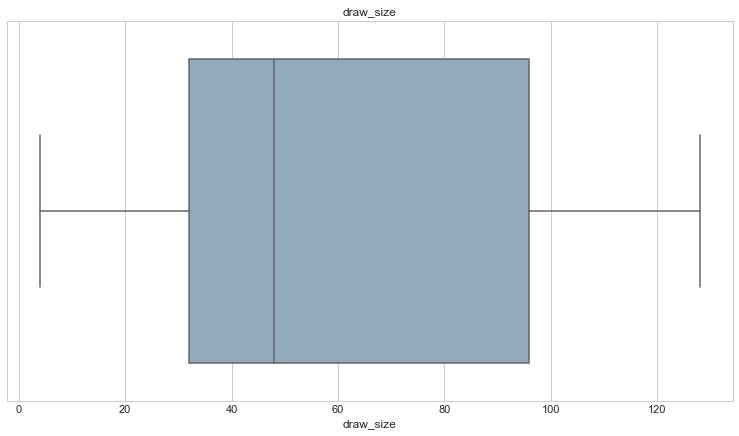

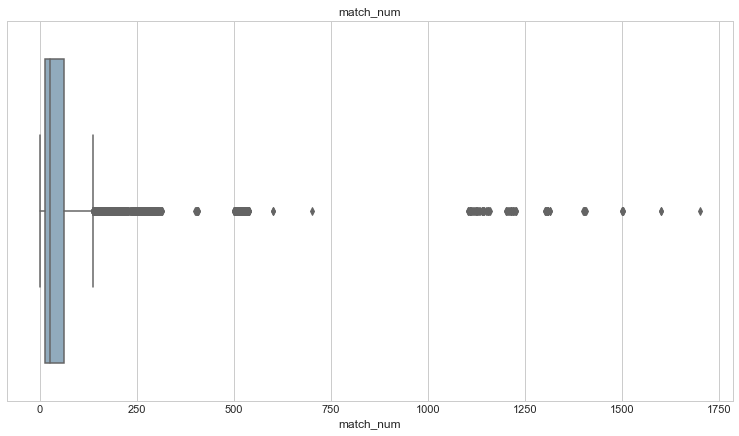

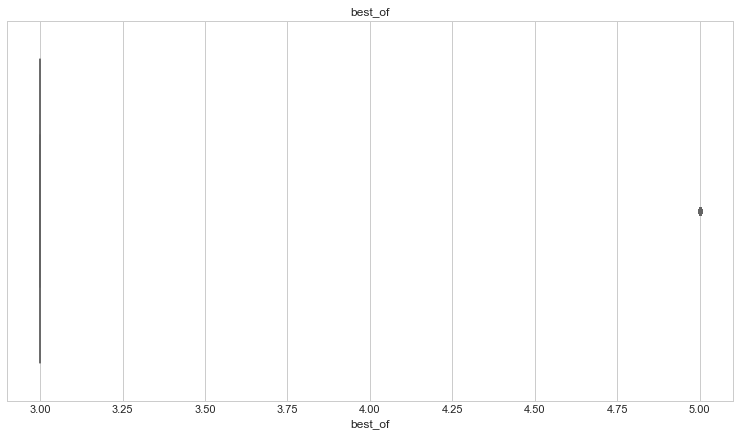

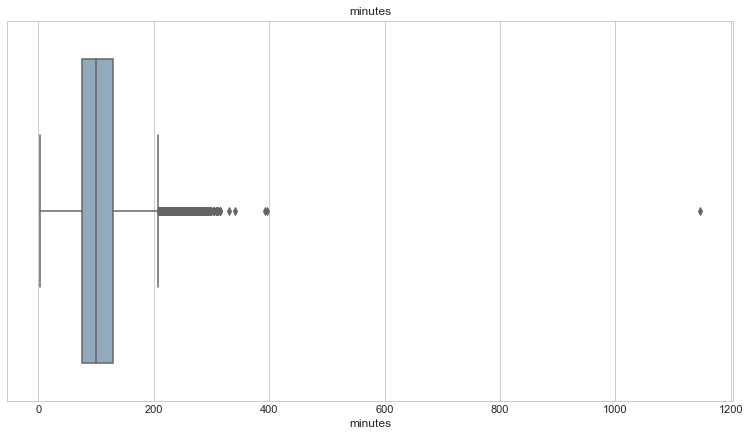

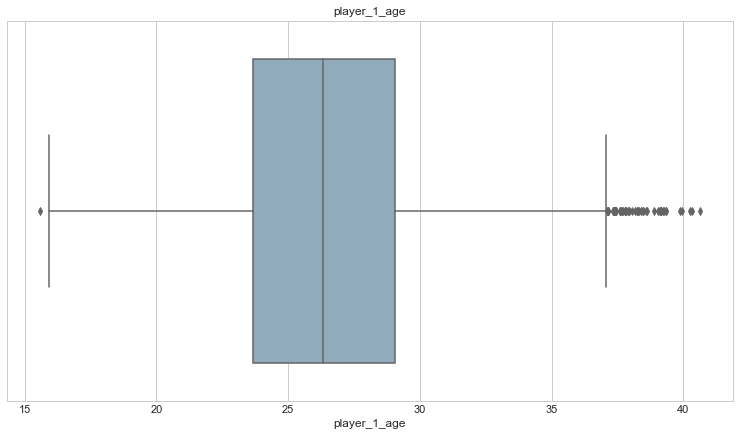

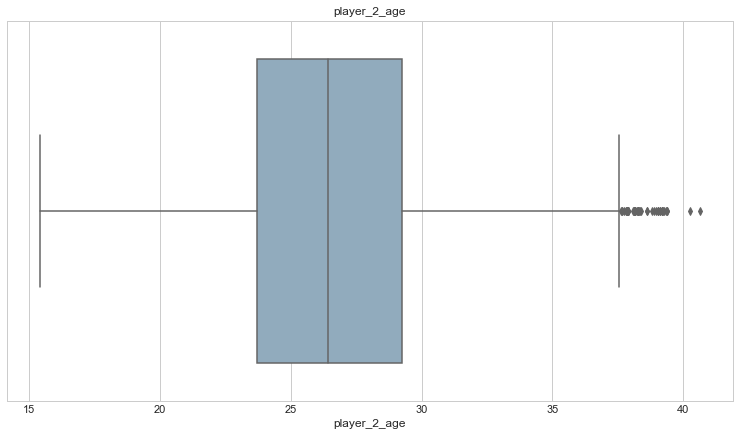

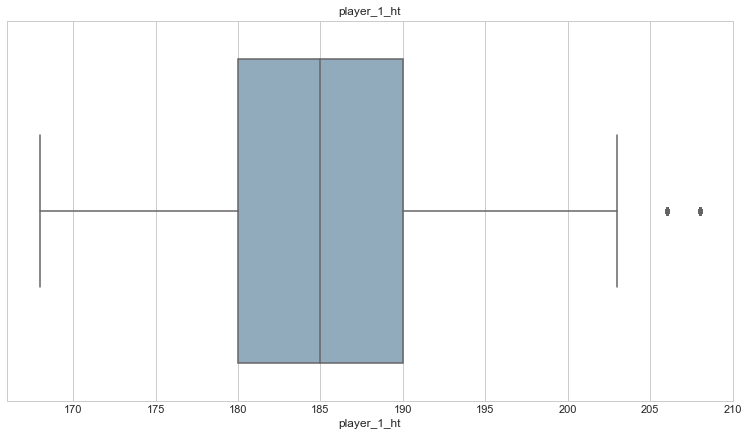

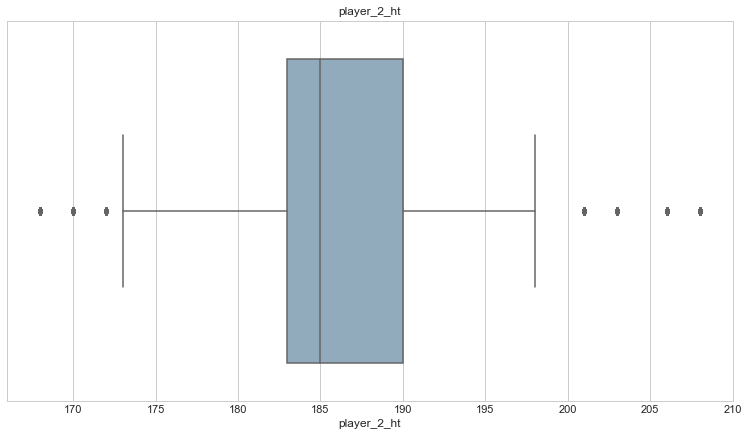

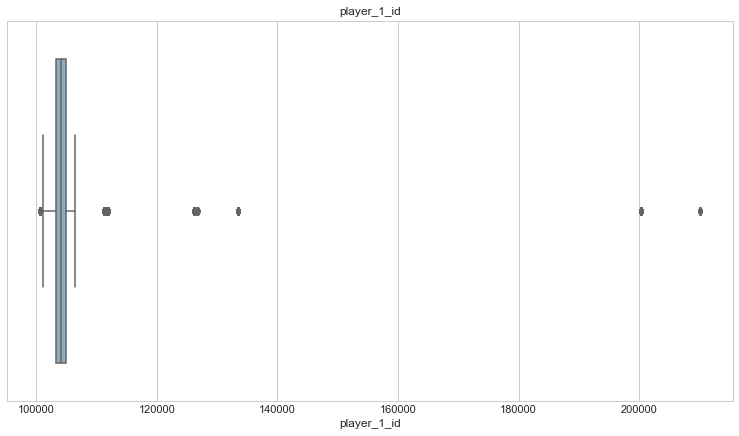

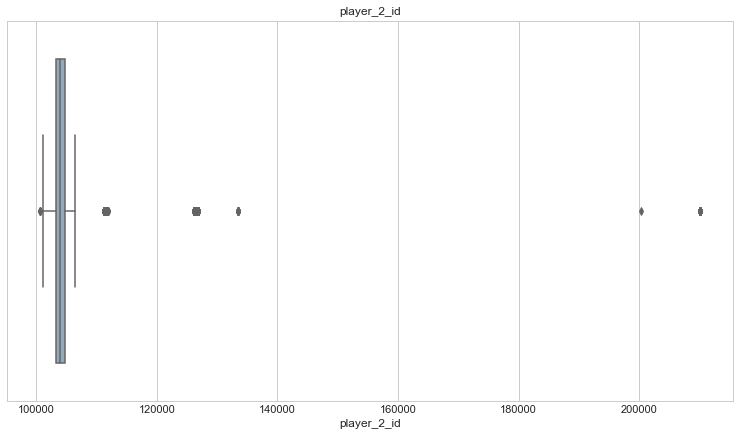

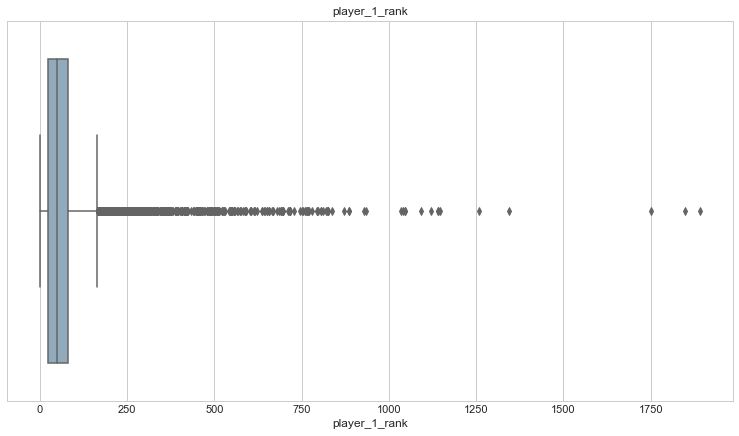

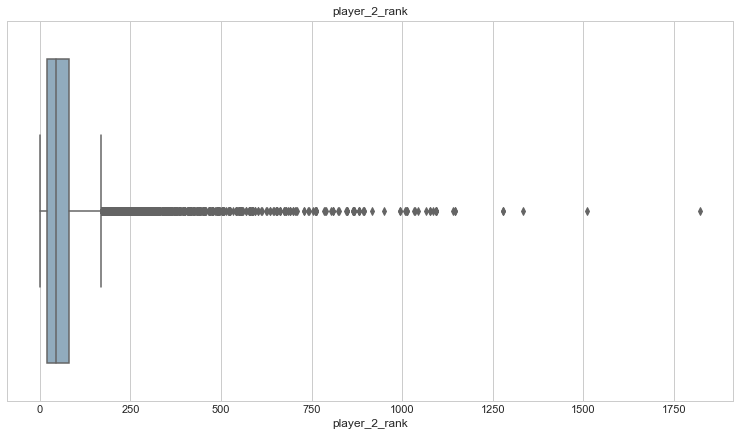

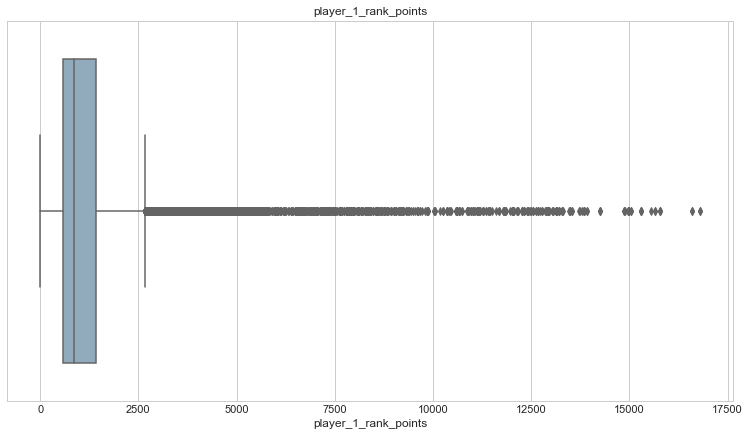

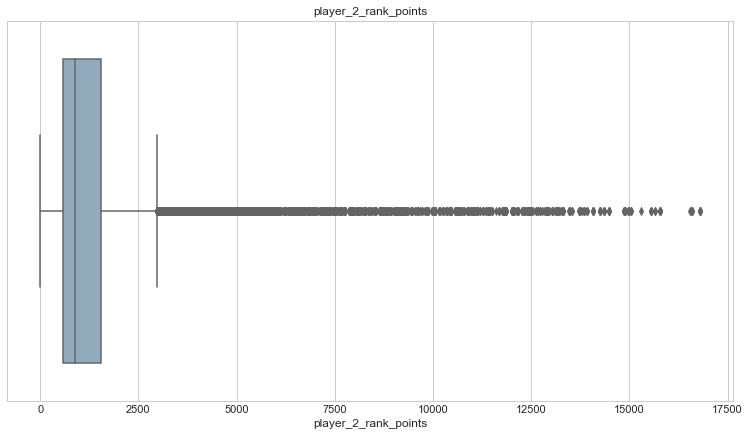

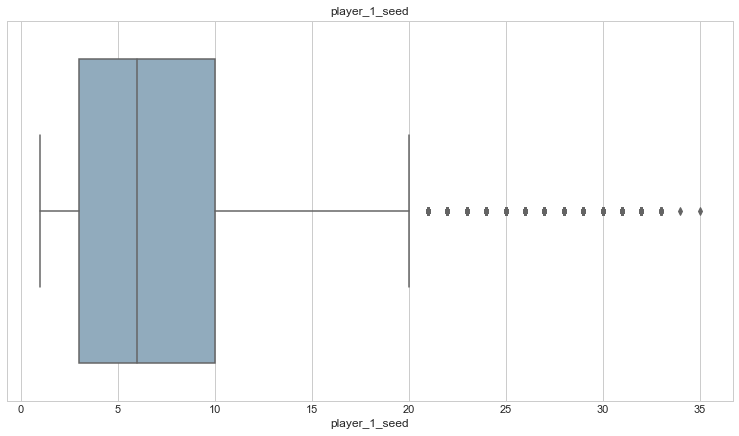

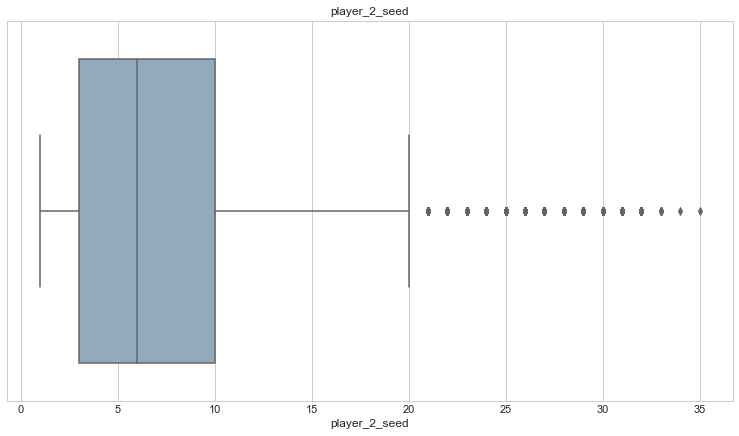

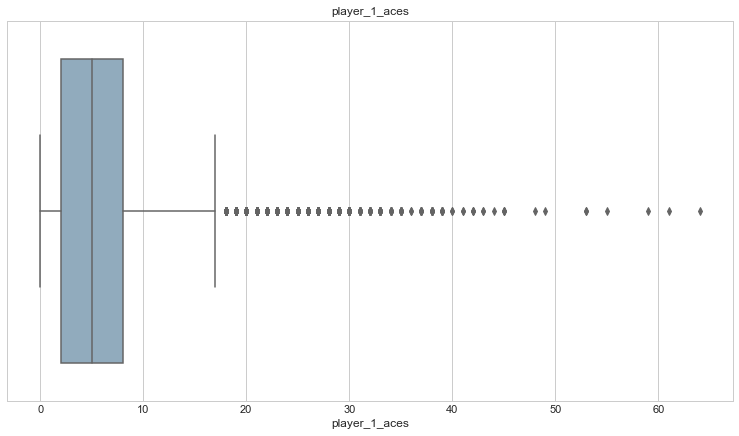

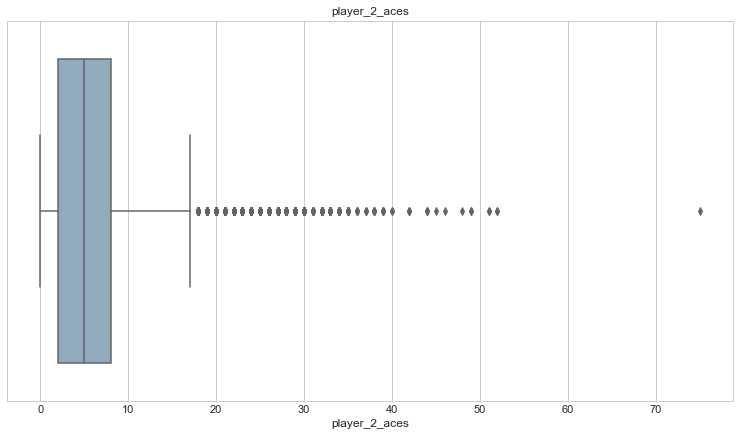

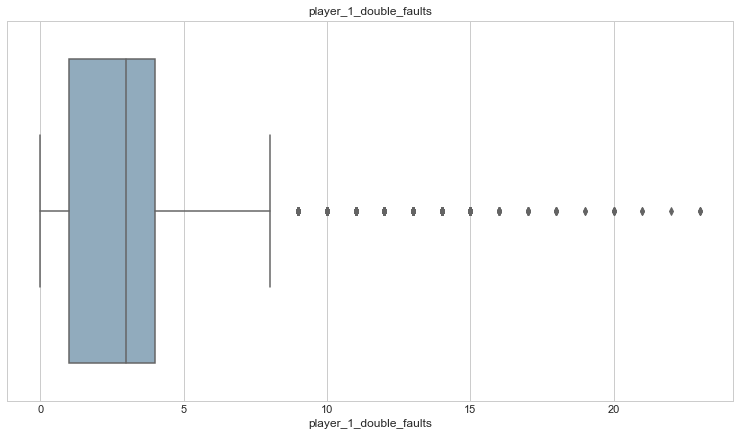

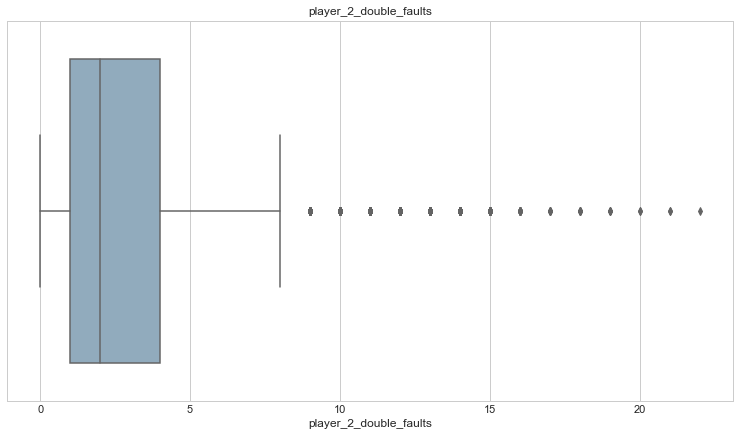

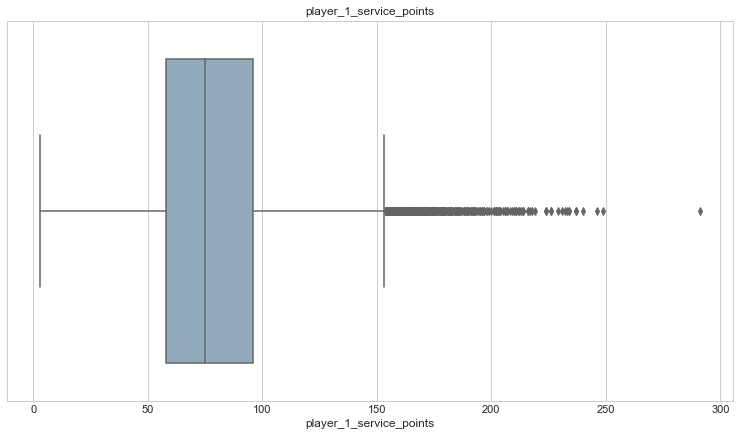

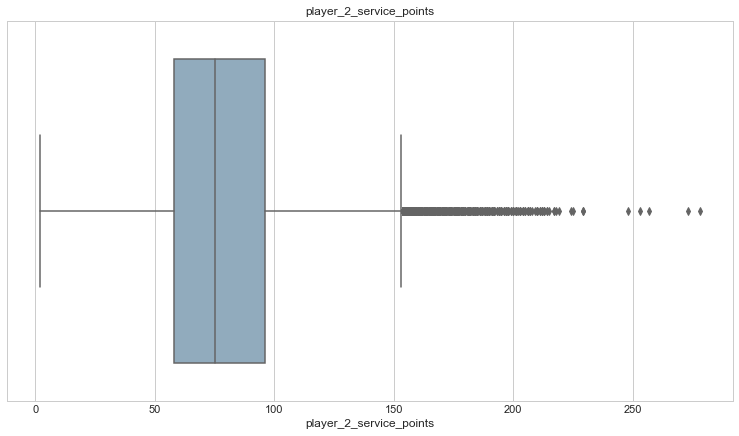

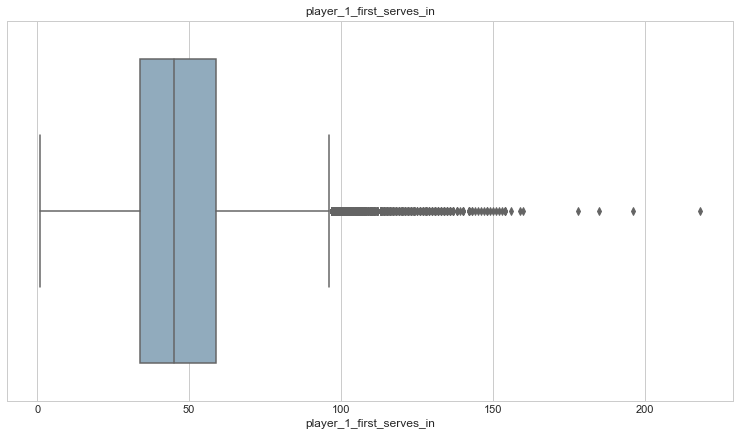

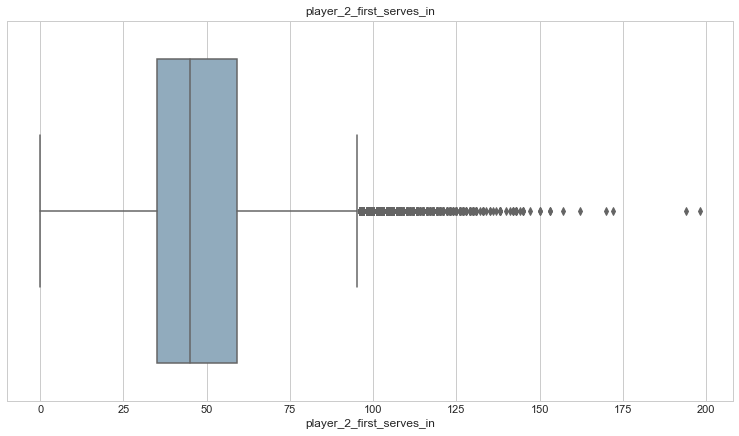

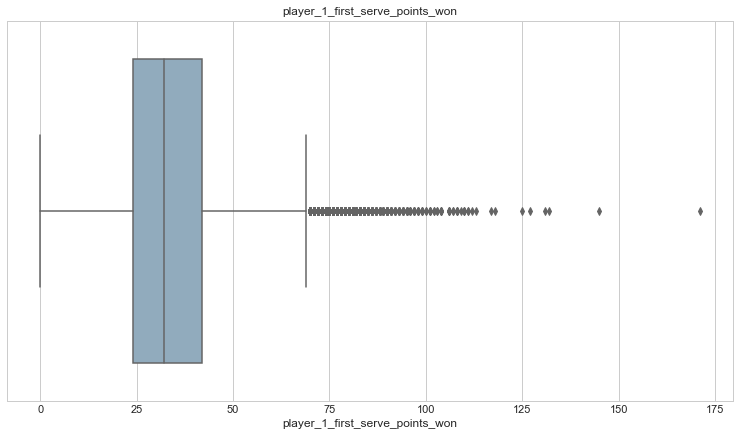

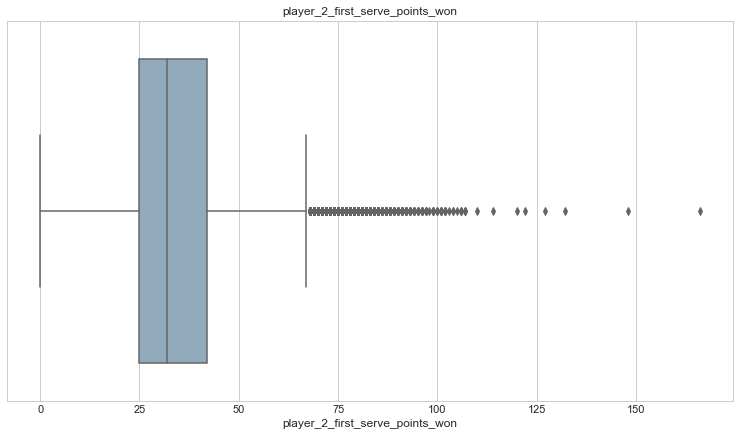

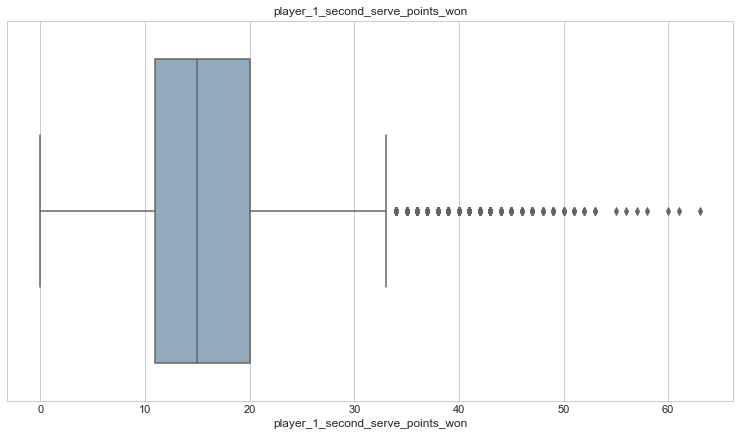

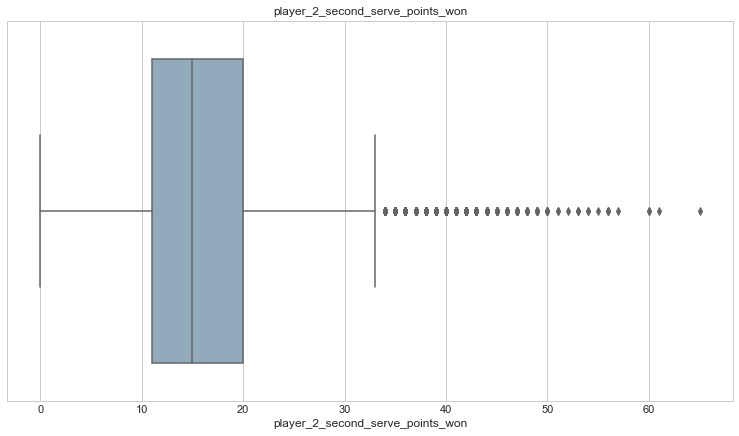

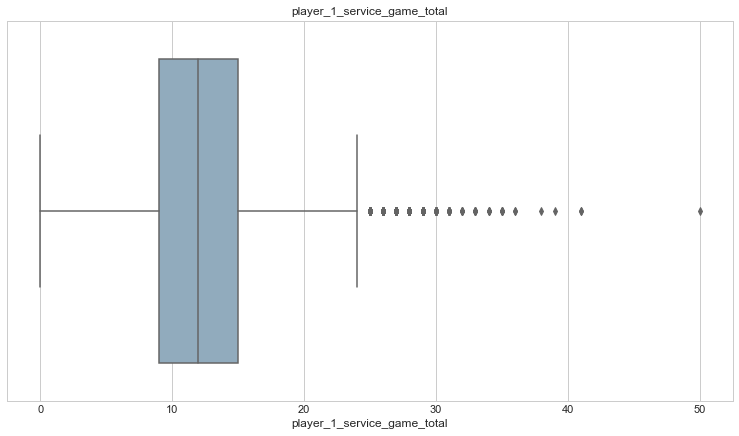

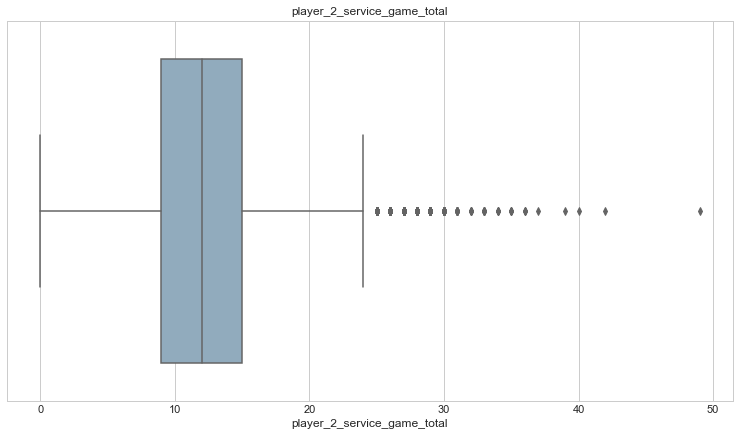

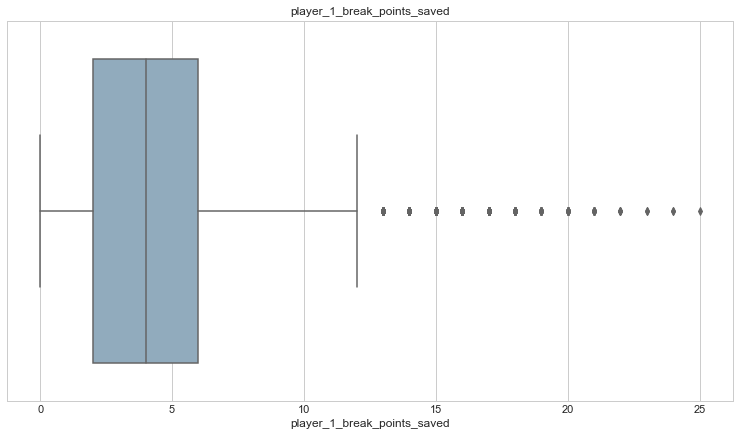

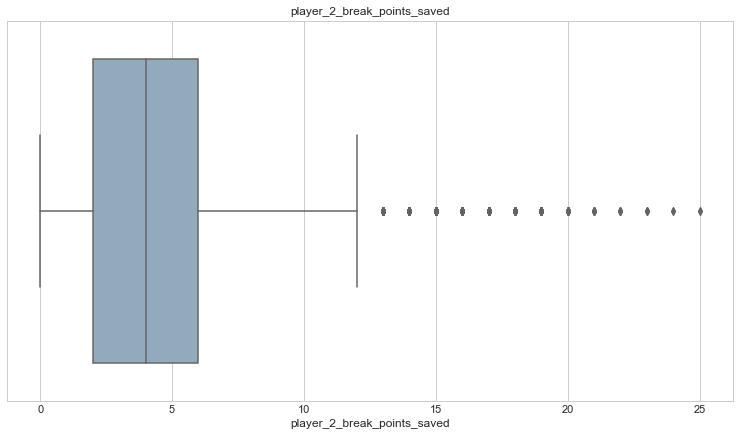

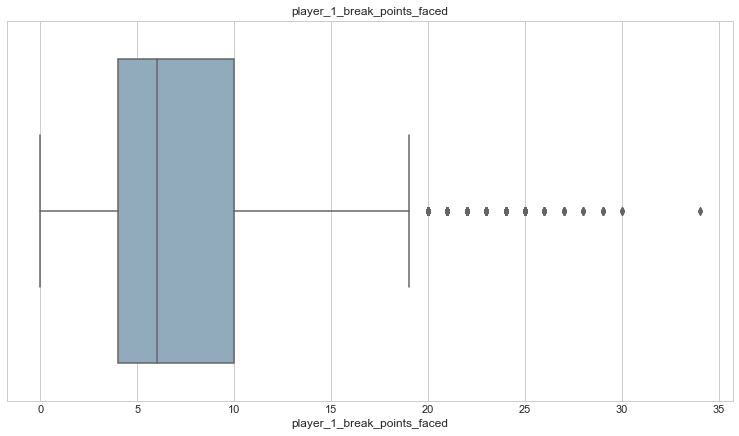

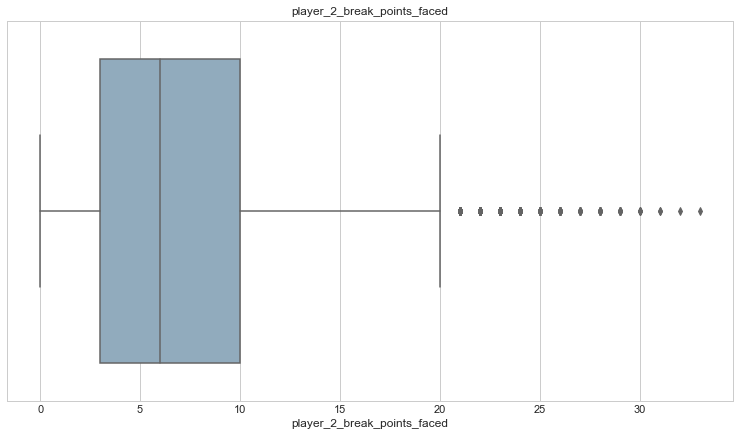

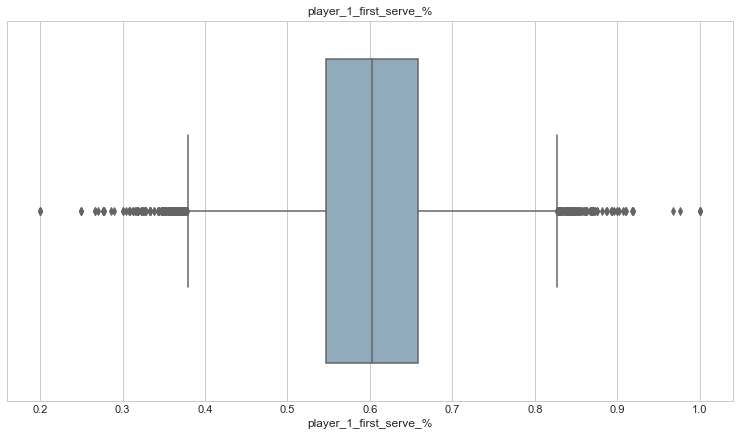

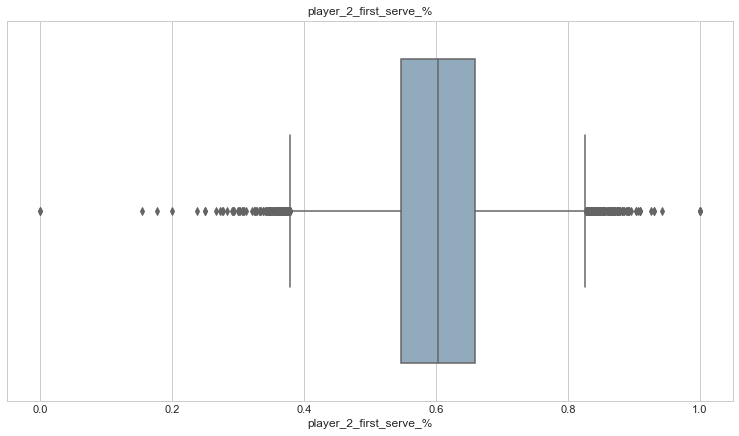

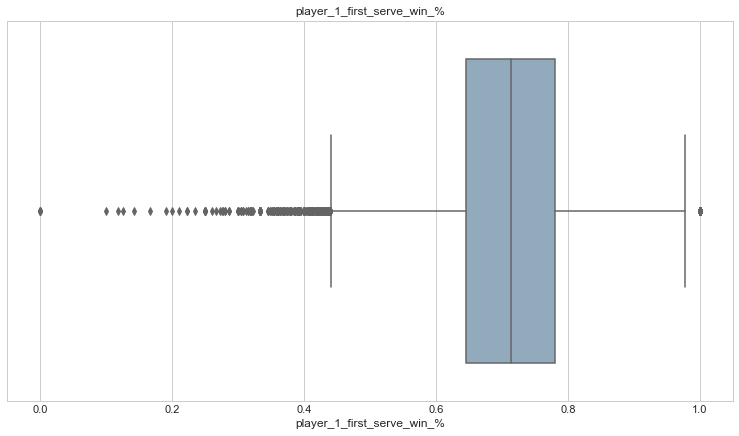

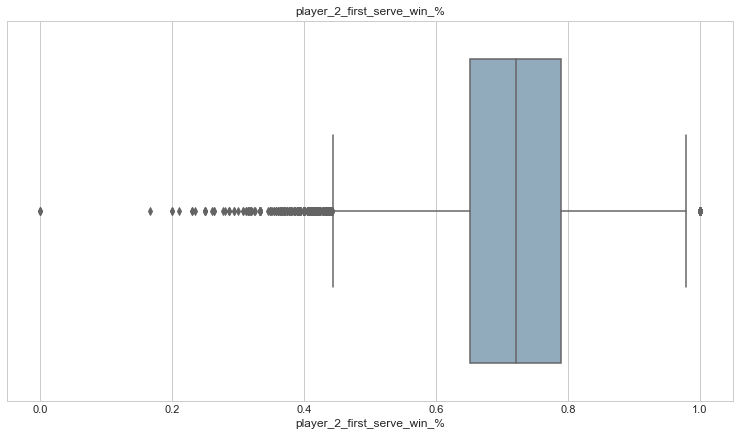

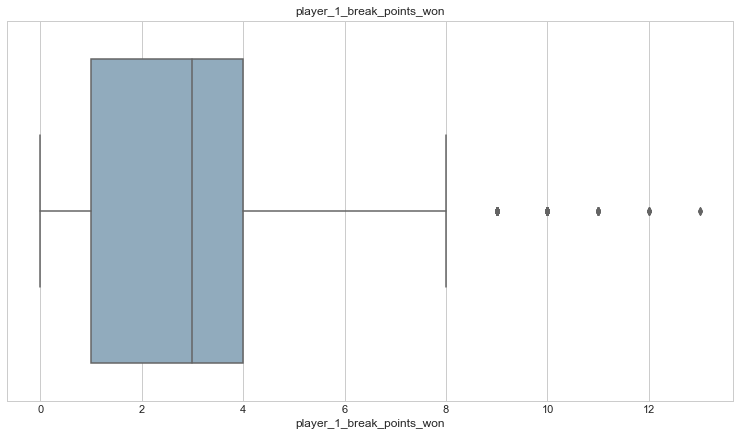

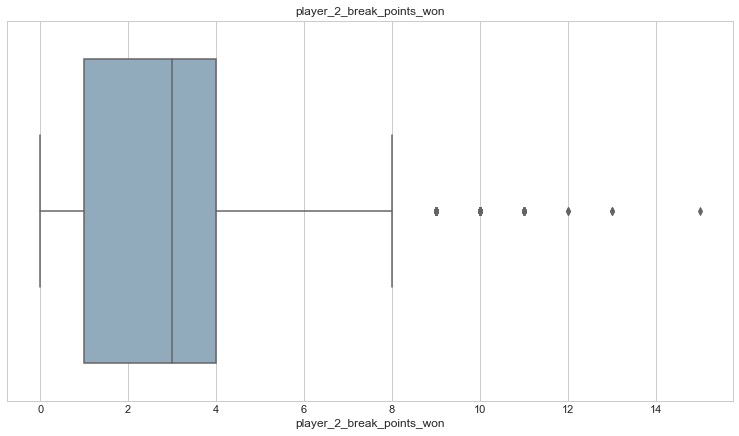

In [12]:
# visualize features for outliers
for col in df_numeric:
    sns.boxplot(df_numeric[col])
    plt.title(col)
    plt.show()
        


In [13]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
draw_size,35969.0,60.661236,38.090260,4.000000,32.000000,48.000000,96.000000,128.00000
match_num,35969.0,65.923990,104.024254,1.000000,14.000000,27.000000,63.000000,1701.00000
best_of,35969.0,3.416136,0.811863,3.000000,3.000000,3.000000,3.000000,5.00000
minutes,35100.0,106.556809,41.168494,3.000000,76.000000,99.000000,129.000000,1146.00000
player_1_age,35969.0,26.434262,3.759698,15.583847,23.668720,26.316222,29.045859,40.62423
player_2_age,35969.0,26.559568,3.854145,15.433265,23.712526,26.444901,29.267625,40.62423
player_1_ht,35881.0,185.471141,6.916705,168.000000,180.000000,185.000000,190.000000,208.00000
player_2_ht,35899.0,186.227444,6.693558,168.000000,183.000000,185.000000,190.000000,208.00000
player_1_id,35969.0,104351.322027,4776.517978,100644.000000,103206.000000,104022.000000,104871.000000,210013.00000
player_2_id,35969.0,104265.488254,3754.898348,100644.000000,103264.000000,103990.000000,104745.000000,210013.00000


In [14]:
# creat a list of ranks and make them a numpay array 
rank_list = df.player_1_rank.unique()

In [15]:
rank_list

array([ 104.,   75.,   19.,   34.,    5.,   50.,    9.,   14.,   29.,
         22.,    3.,   30.,   38.,   13.,   23.,   33.,   74.,   47.,
         63.,   48.,   67.,  126.,  105.,   44.,   52.,   64.,   20.,
         70.,   51.,   71.,   16.,   28.,   45.,   54.,  111.,   62.,
        101.,  107.,  127.,    8.,    6.,   21.,   91.,   11.,   31.,
          4.,   68.,   53.,   59.,   18.,   87.,   25.,   61.,   15.,
         56.,   nan,  100.,   35.,  133.,   76.,   55.,   82.,   86.,
         83.,   43.,  103.,   46.,  237.,   72.,   80.,  446.,   42.,
         65.,   40.,   12.,    7.,   39.,  178.,   49.,  717.,   98.,
         88.,   93.,  110.,  114.,   10.,   41.,   32.,   26.,   24.,
         36.,    1.,   90.,   73.,   92.,  550.,   78.,   37.,   27.,
         57.,    2.,  106.,   81.,   77.,   17.,  171.,   58.,  251.,
         94.,  169.,  150.,  122.,  490.,   95.,  156.,   84.,  173.,
         79.,   89.,   85.,   96.,  166.,  161.,  263.,  148.,  131.,
        159.,  212.,

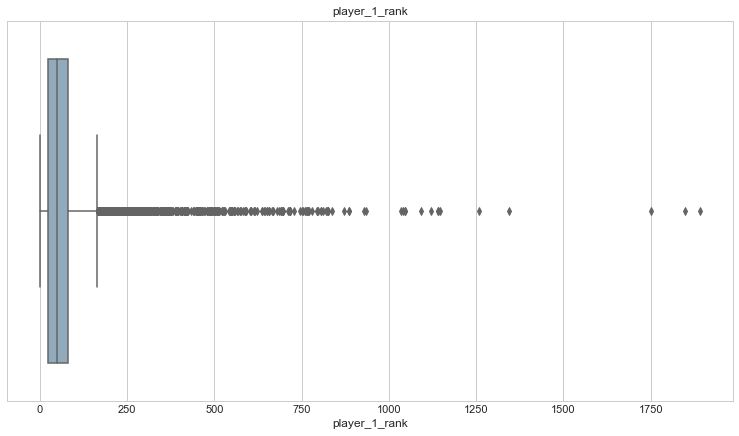

In [16]:
#Barplot rankings to understad the data and the players in it by ranking 
sns.boxplot(df['player_1_rank'])
plt.title('player_1_rank')
plt.show()

In [17]:
df.player_1_rank.describe()

count    35952.000000
mean        60.415638
std         66.378909
min          1.000000
25%         23.000000
50%         48.000000
75%         80.000000
max       1890.000000
Name: player_1_rank, dtype: float64

- We can use the top 250 ranked players to create a frame of players that have consistent data. Rank above 250 seem to be outliers meaning that they are not precent enogh in our data.
- after 36-37 years of age, tennis players start to become outliers in competition

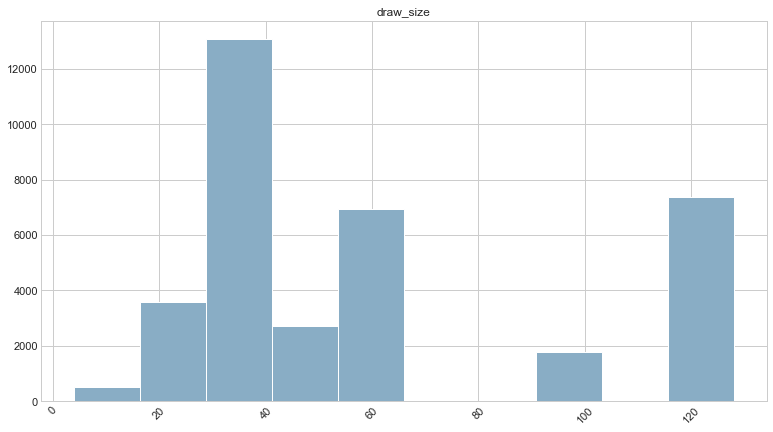

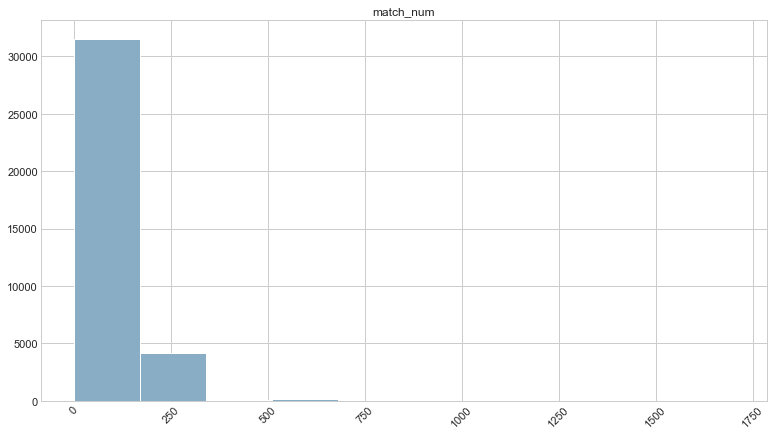

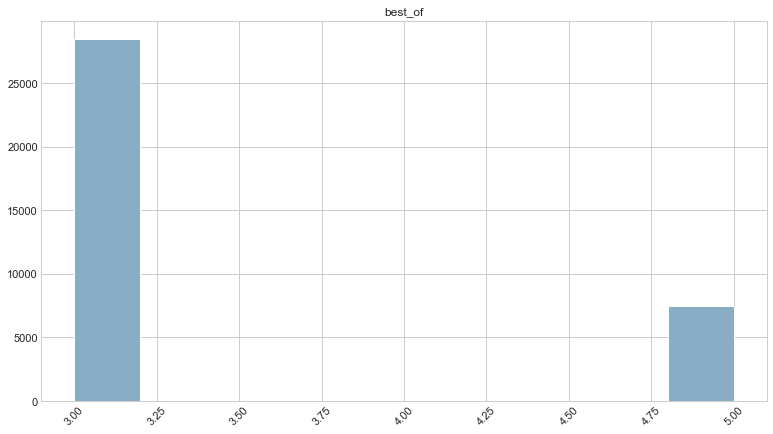

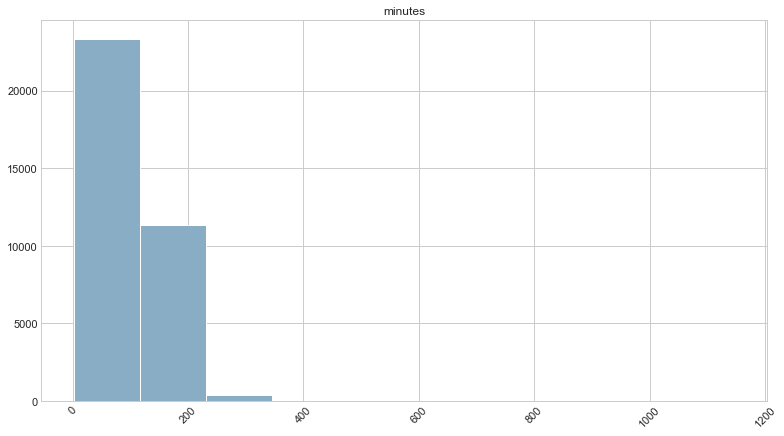

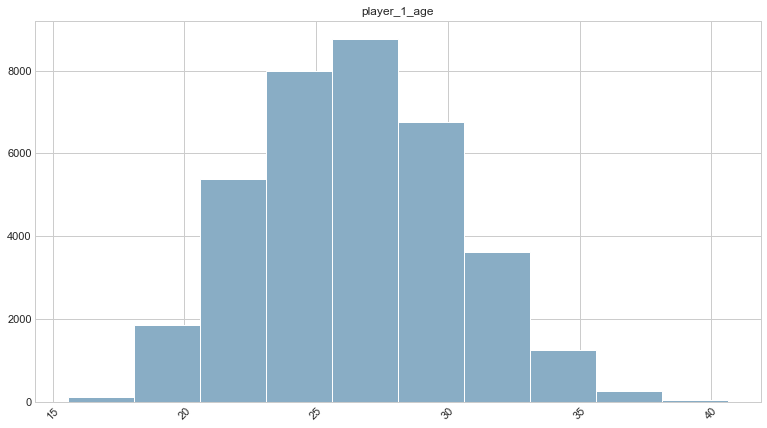

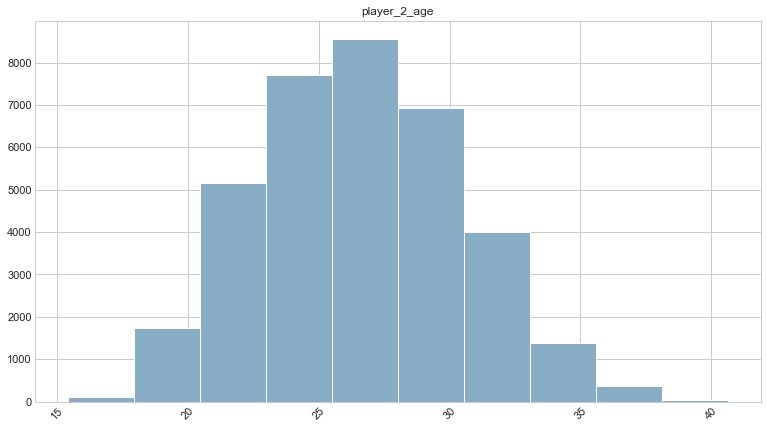

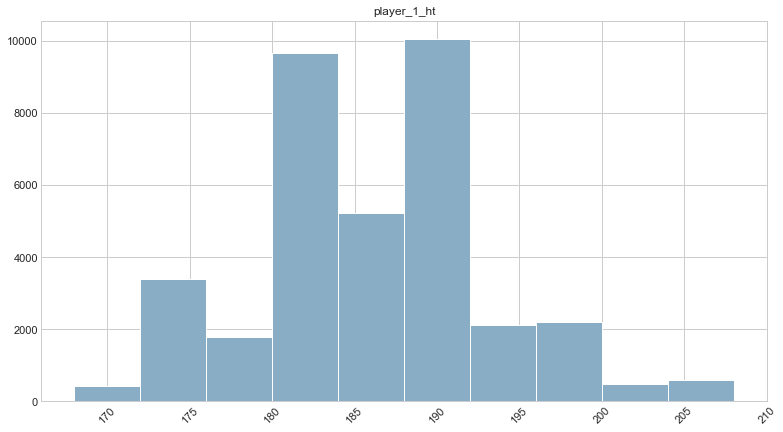

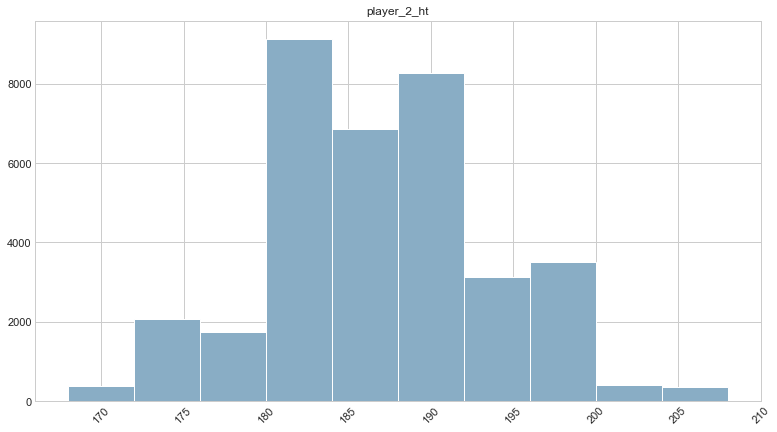

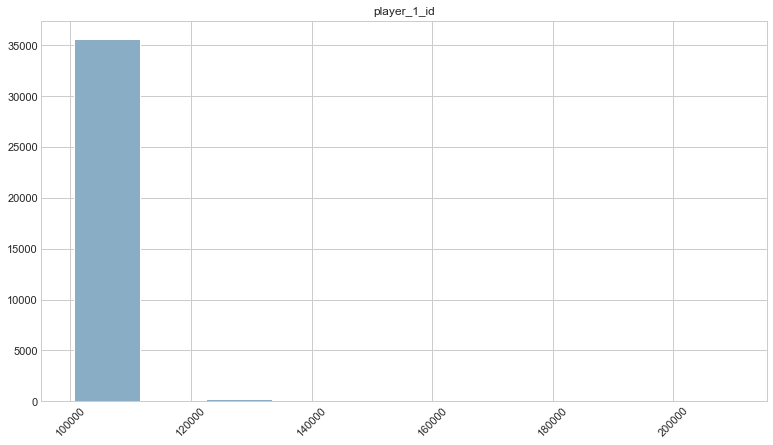

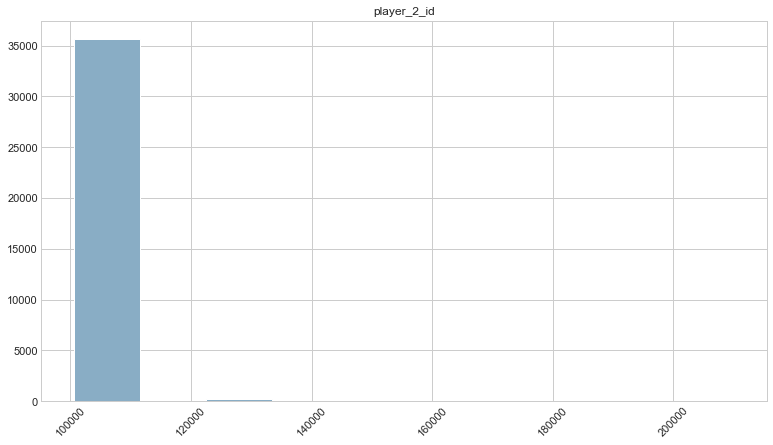

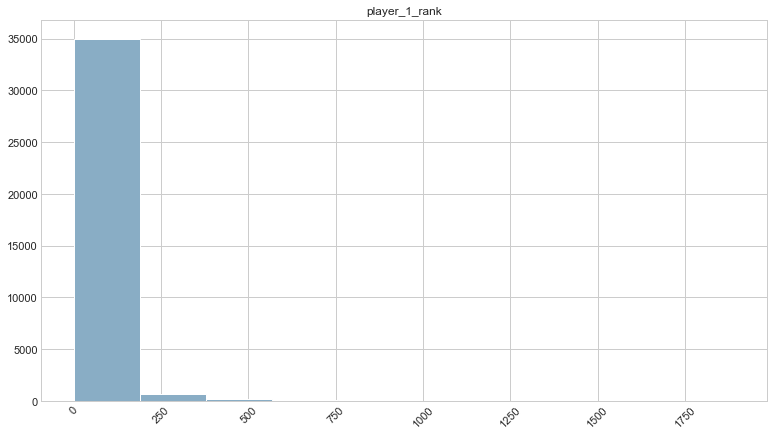

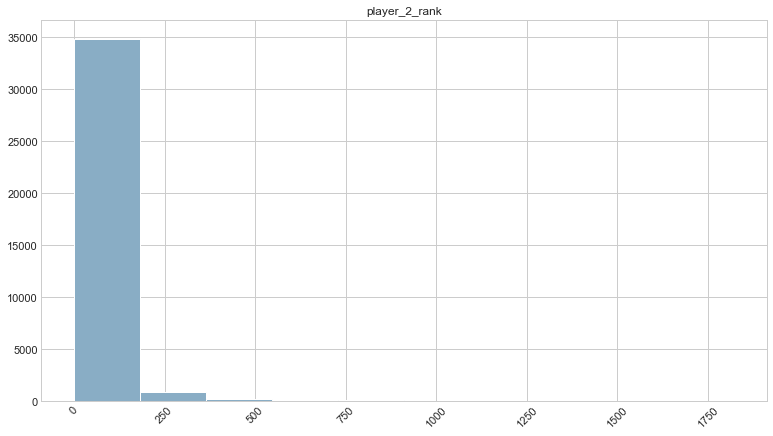

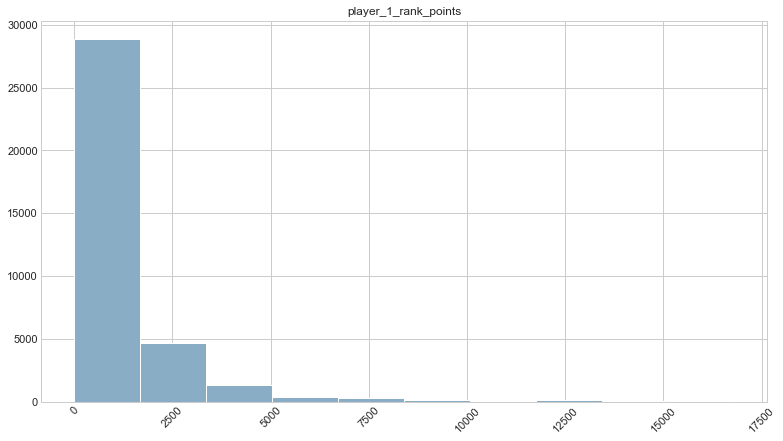

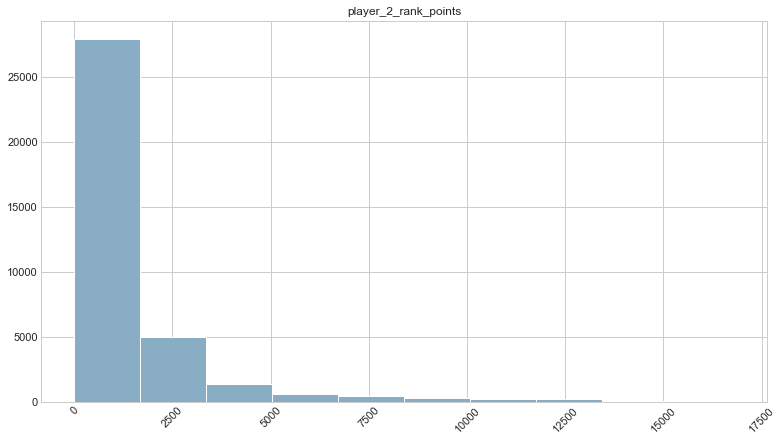

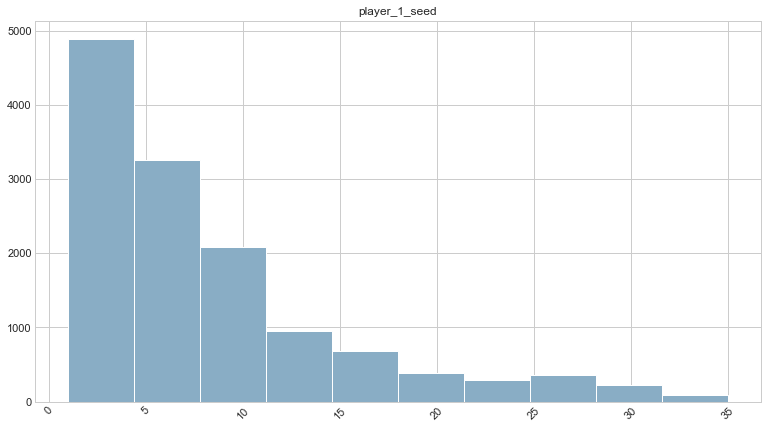

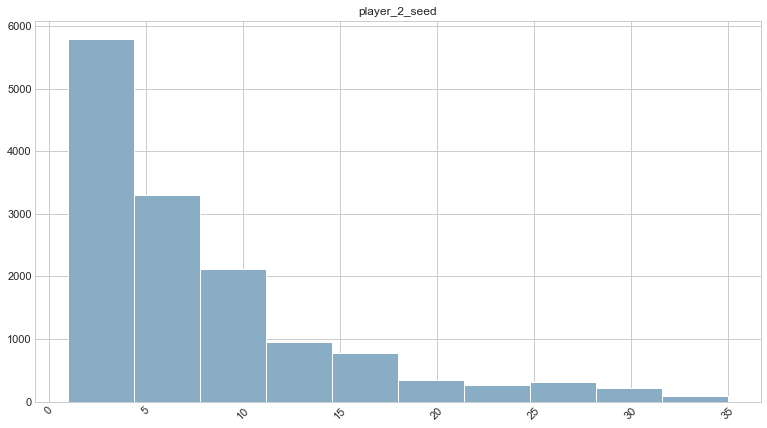

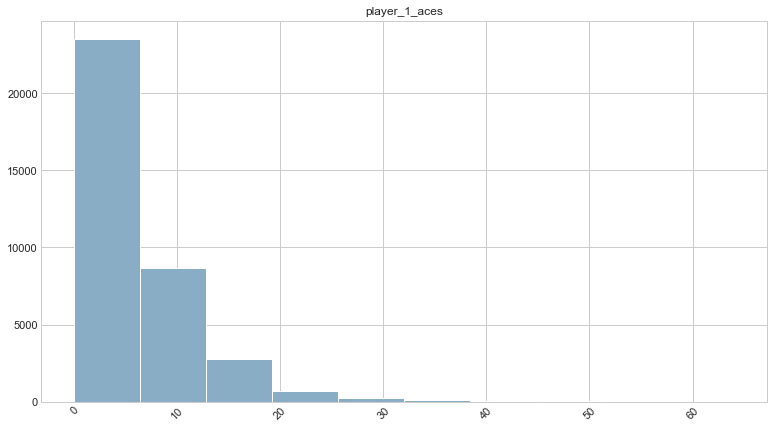

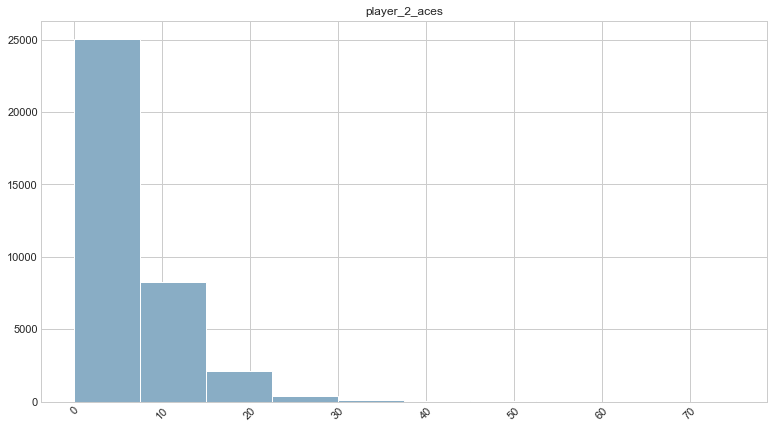

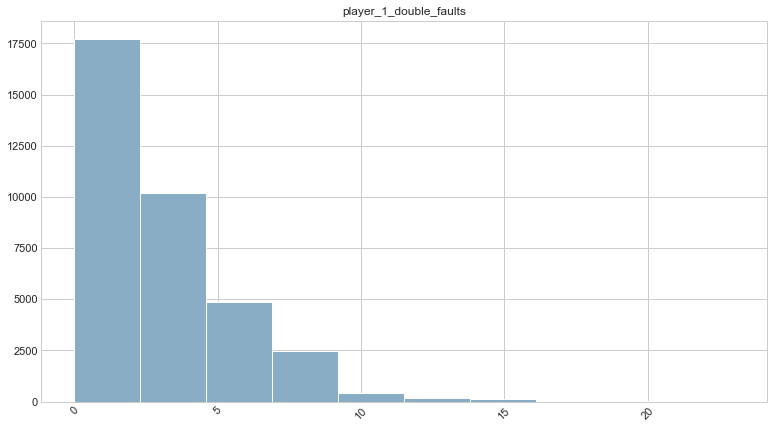

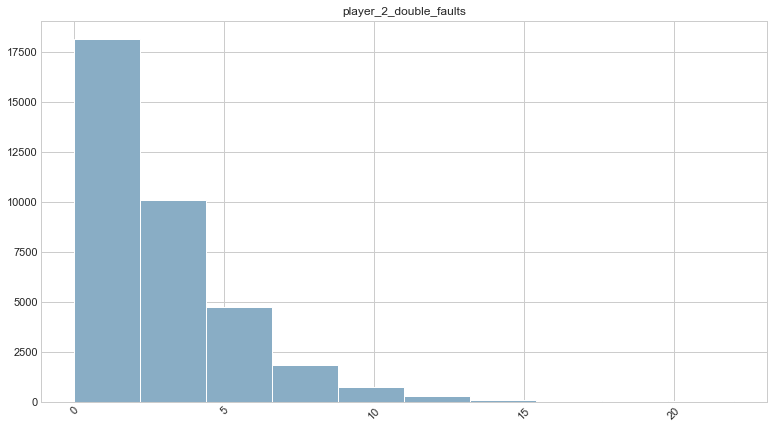

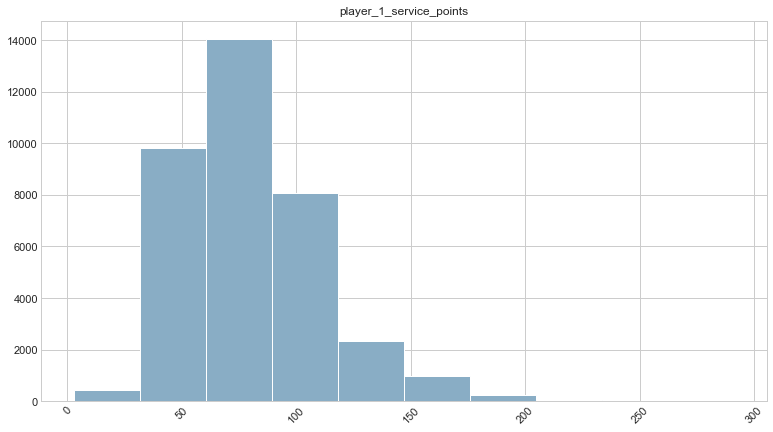

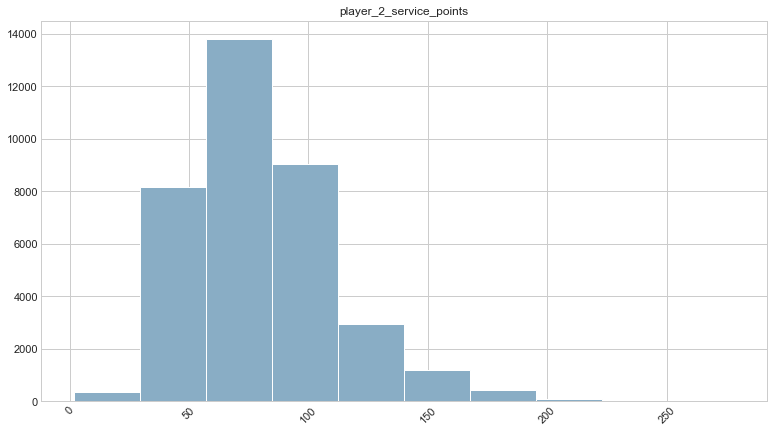

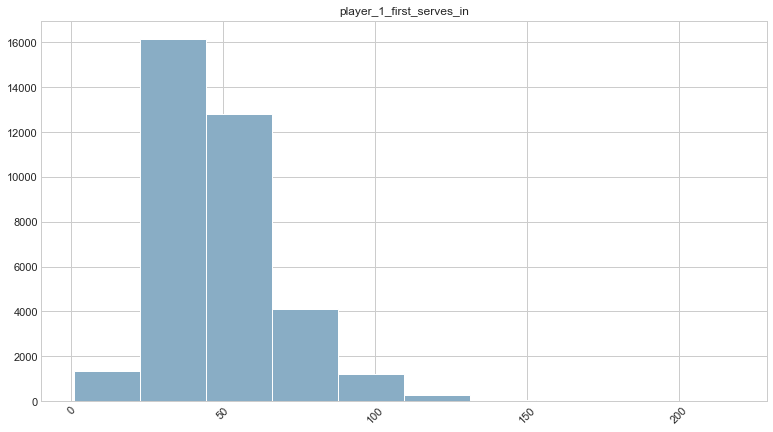

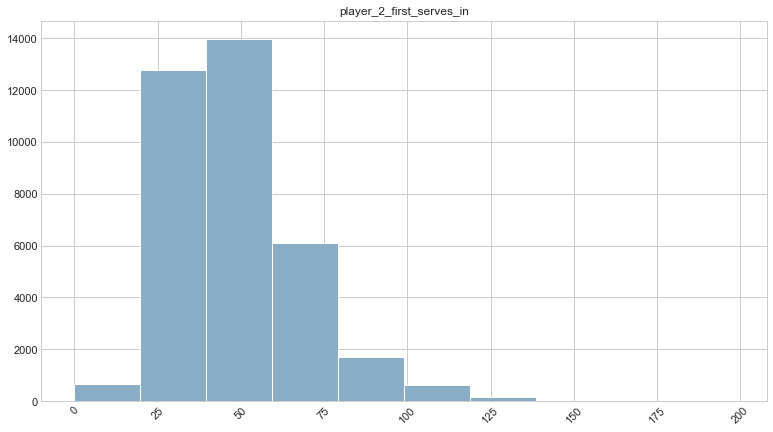

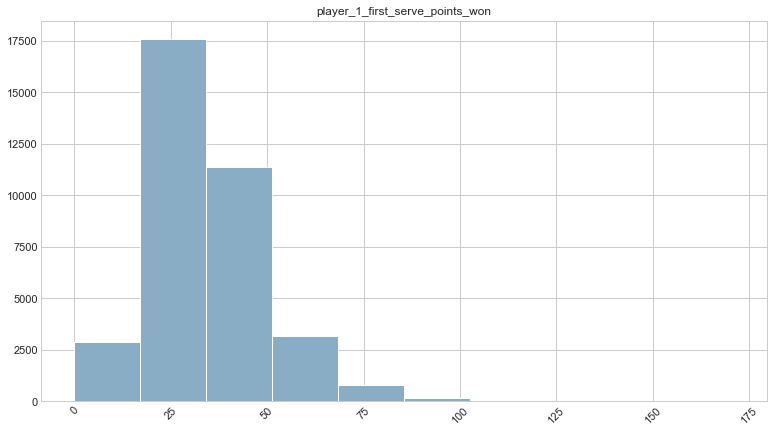

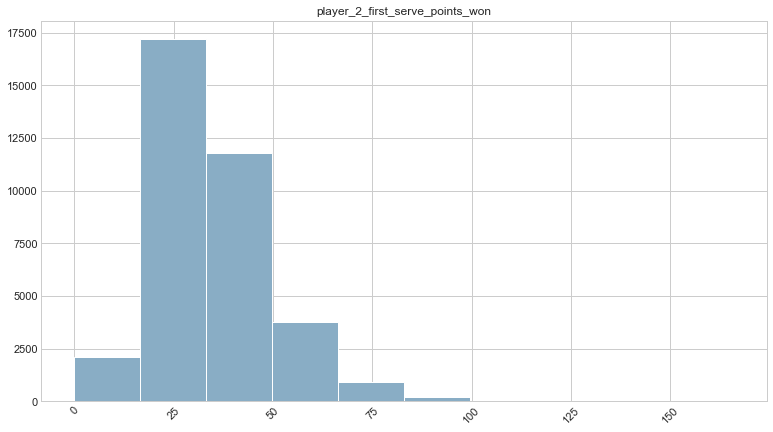

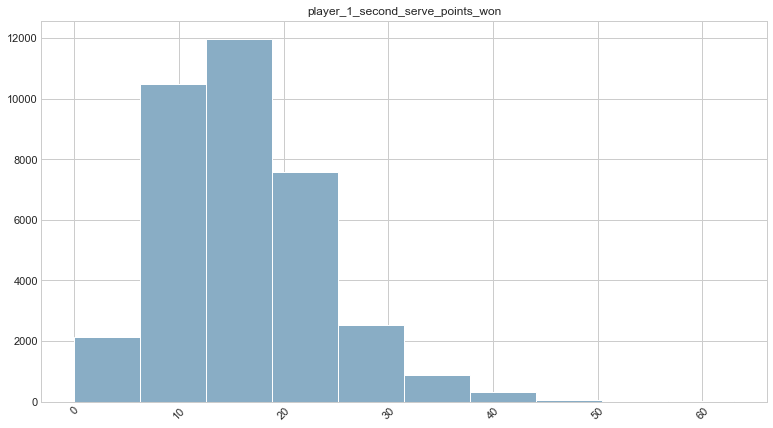

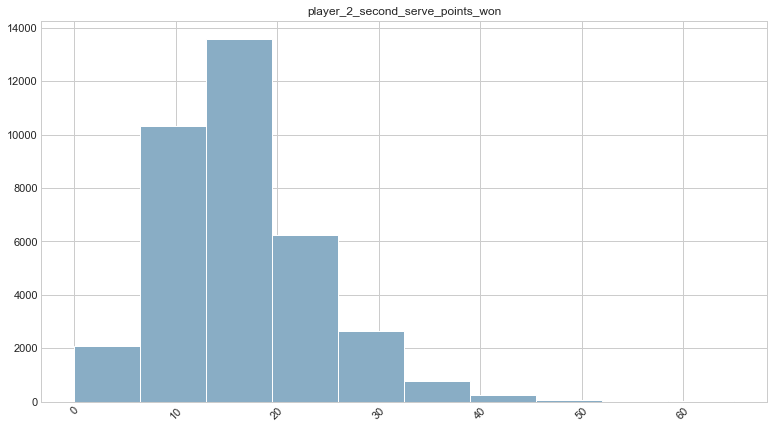

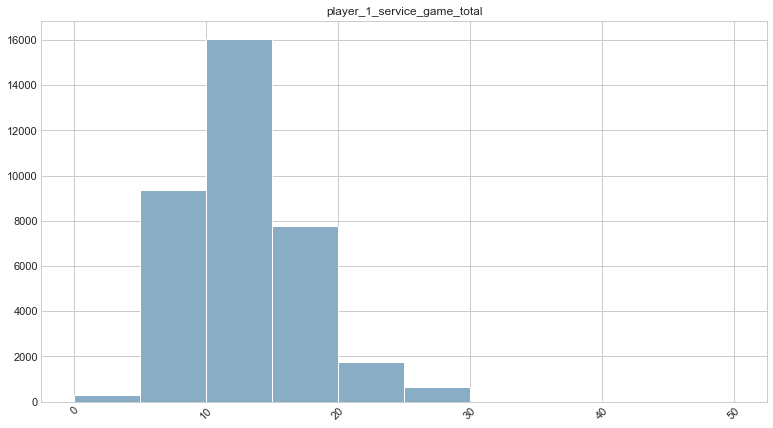

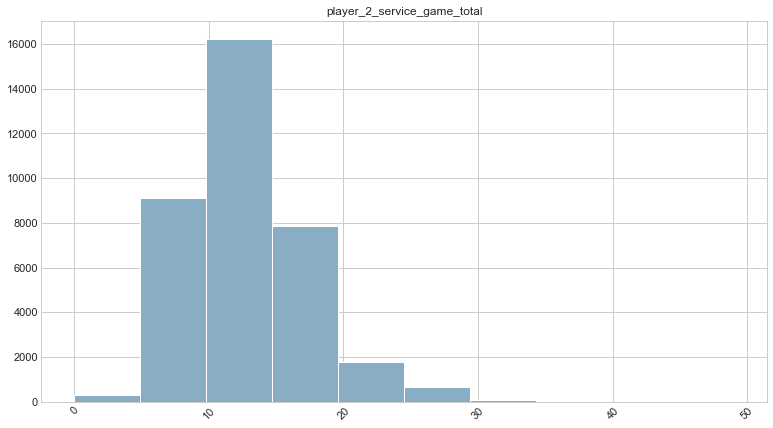

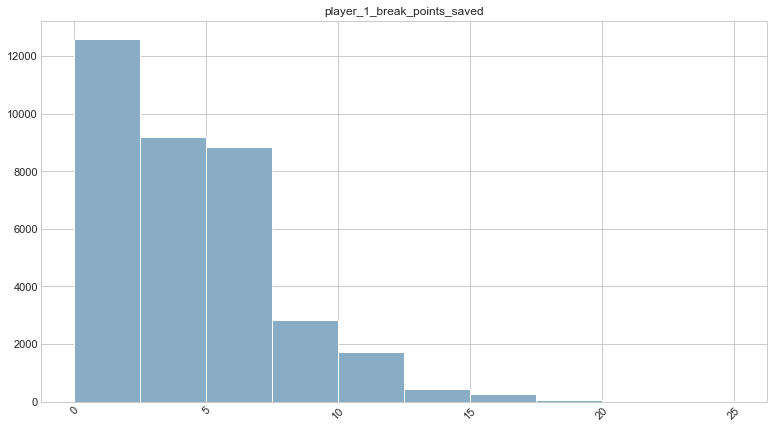

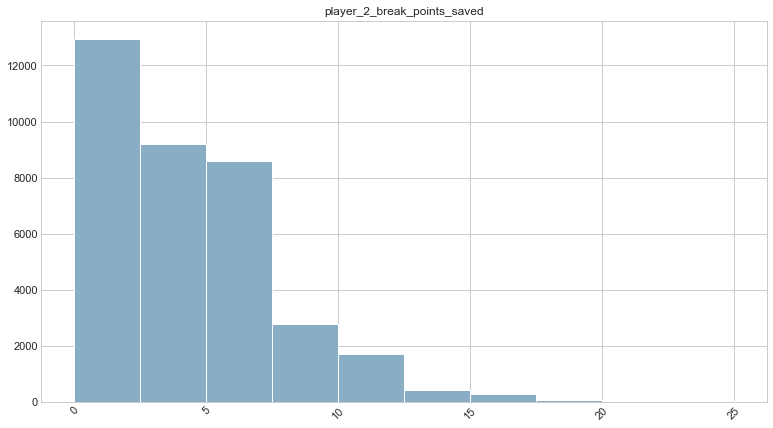

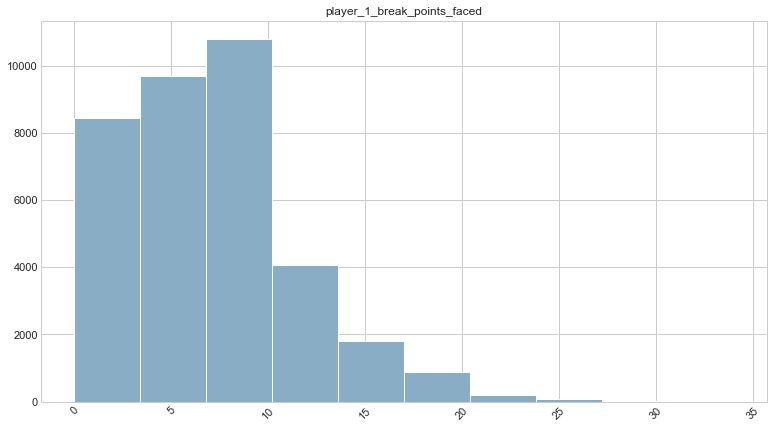

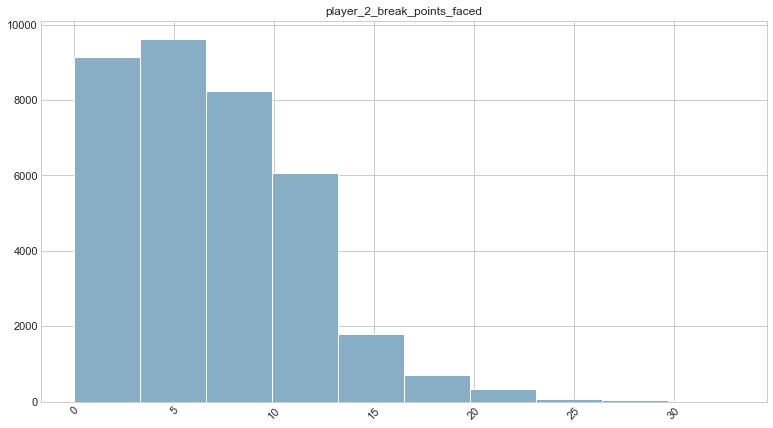

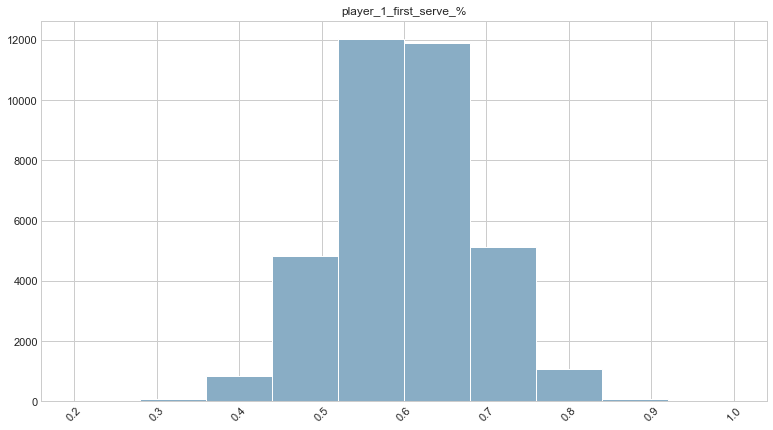

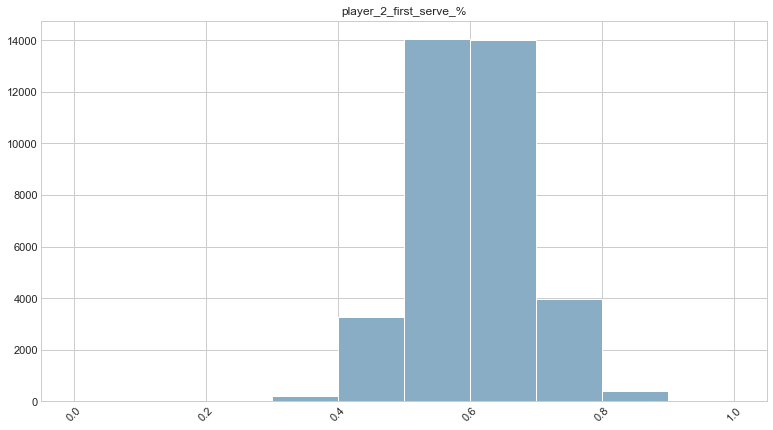

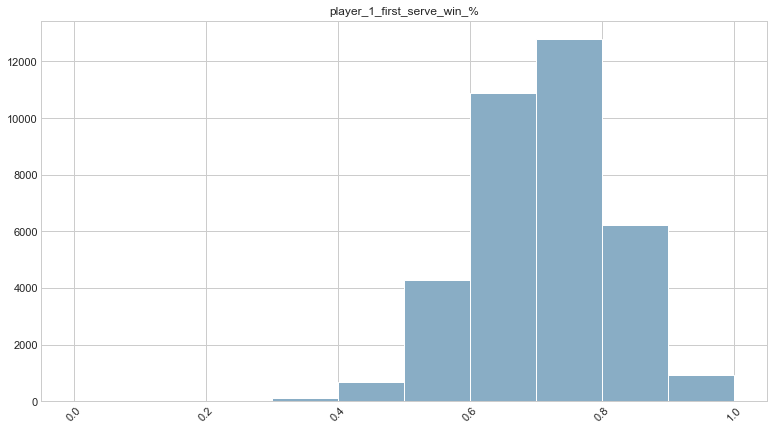

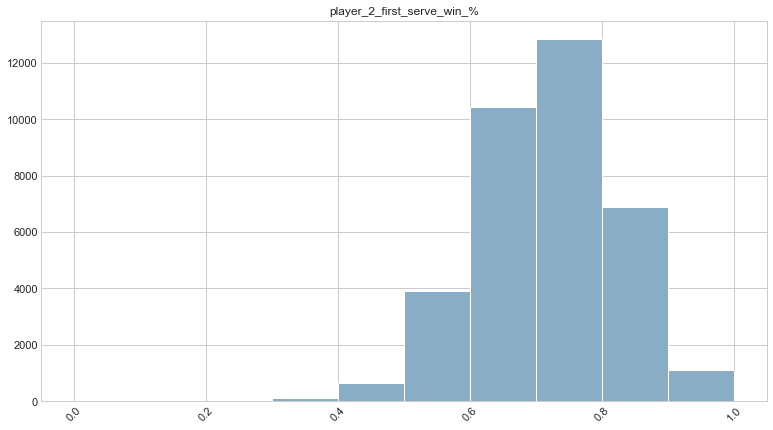

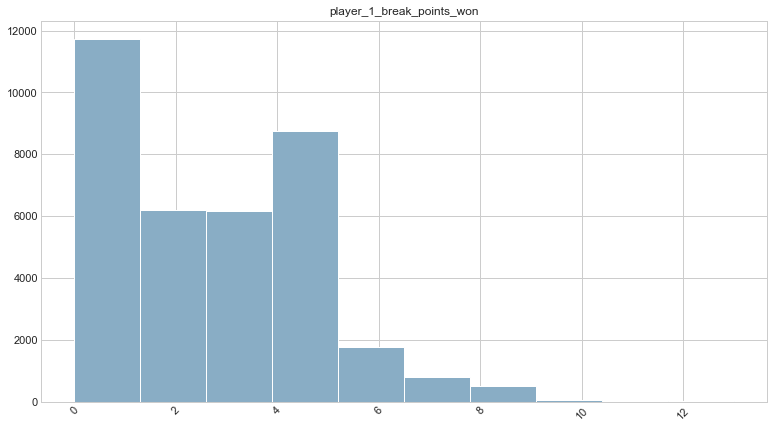

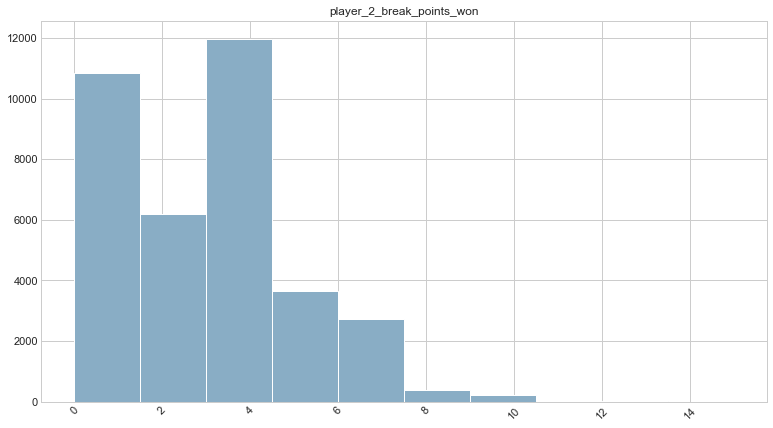

In [18]:
# create histograms of the data
# visualize features for outliers
for col in df_numeric:
    df_numeric[col].hist()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()
        


In [19]:
# use split function from 
def split_data(df):
    from sklearn.model_selection import train_test_split
    '''
    Takes in a dataframe and returns train, validate, and test subset dataframes. 
    '''
    train, test = train_test_split(df, test_size = .2, random_state = 123)
    train, validate = train_test_split(train, test_size = .3, random_state = 123)
    
    return train, validate, test

# Split data 

In [20]:
train, validate, test = split_data(df)

In [21]:
train.shape, validate.shape, test.shape

((20142, 75), (8633, 75), (7194, 75))

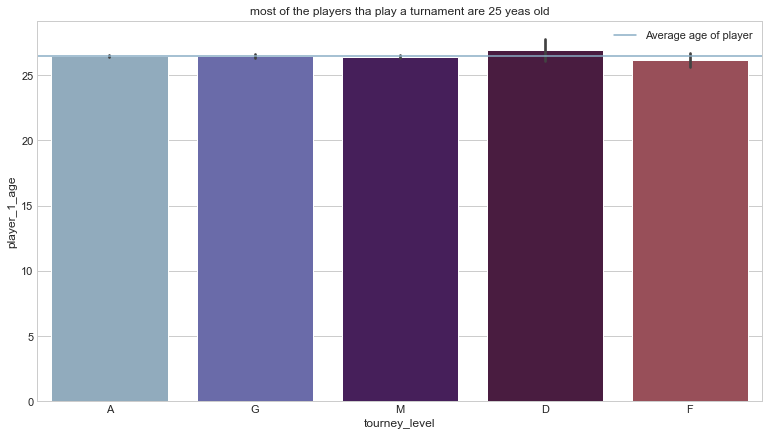

In [22]:
plt.title("most of the players tha play a turnament are 25 yeas old")
sns.barplot(x="tourney_level", y="player_1_age", data=train)
age_mean = train.player_1_age.mean()
plt.axhline(age_mean, label="Average age of player")
plt.legend()
plt.show()


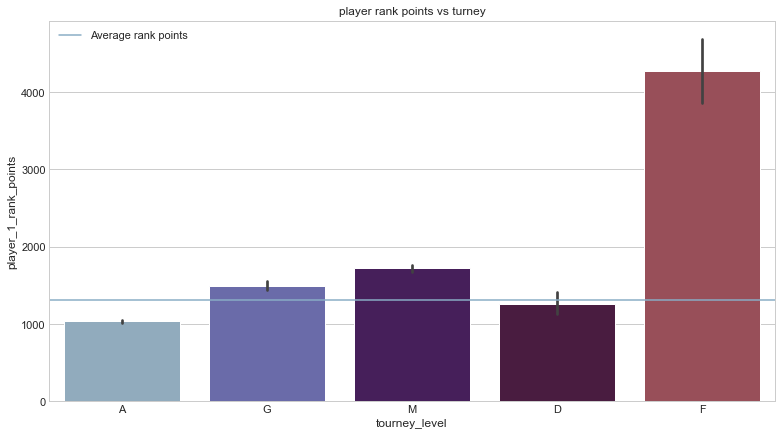

In [23]:
plt.title("player rank points vs turney")
sns.barplot(x="tourney_level", y="player_1_rank_points", data=train)
age_mean = train.player_1_rank_points.mean()
plt.axhline(age_mean, label="Average rank points")
plt.legend()
plt.show()


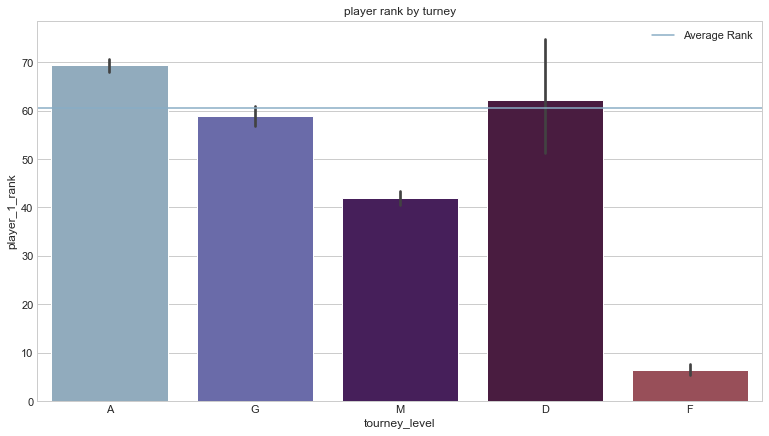

In [24]:
plt.title("player rank by turney")
sns.barplot(x="tourney_level", y="player_1_rank", data=train)
age_mean = train.player_1_rank.mean()
plt.axhline(age_mean, label="Average Rank")
plt.legend()
plt.show()

- Top players play turney level F 
- Only top 10 players play ;evel F
- Turney D seems to be oppen to alot of people
- turney G and M seem to be commetitive to make it to F
-Turney M is the 2nd most valuable turney for highly ranked players

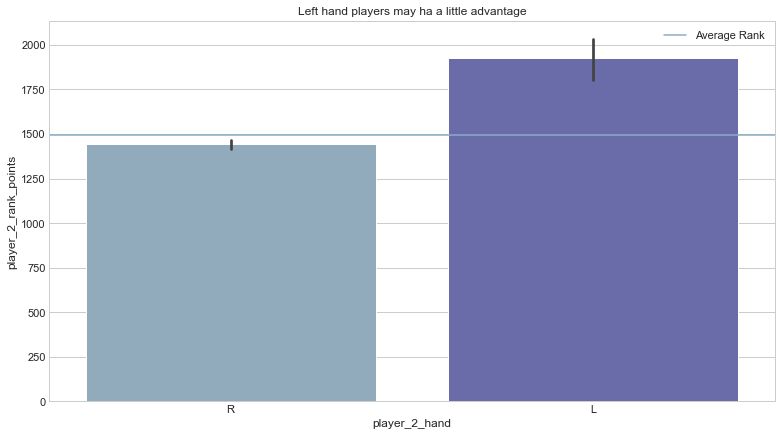

In [25]:
plt.title("Left hand players may ha a little advantage")
sns.barplot(x="player_2_hand", y="player_2_rank_points", data=train)
age_mean = train.player_2_rank_points.mean()
plt.axhline(age_mean, label="Average Rank")
plt.legend()
plt.show()

Do lefties have more ranking points on average than righties?

$H_o$ : Average ranking points between righties and lefties are around the same.

$H_a$ : Average ranking points between righties and lefties are significantly different.

Assumptions for the T-Test:
* Independence of Observations: Ranking points are somewhat dependent on the ranking points of another player. There is only so much of the pie to go around.
Because the observations are not independent of each other, we cannot run a t-test. Let's run a non-parametric test instead. Mann-Whitney U Test.

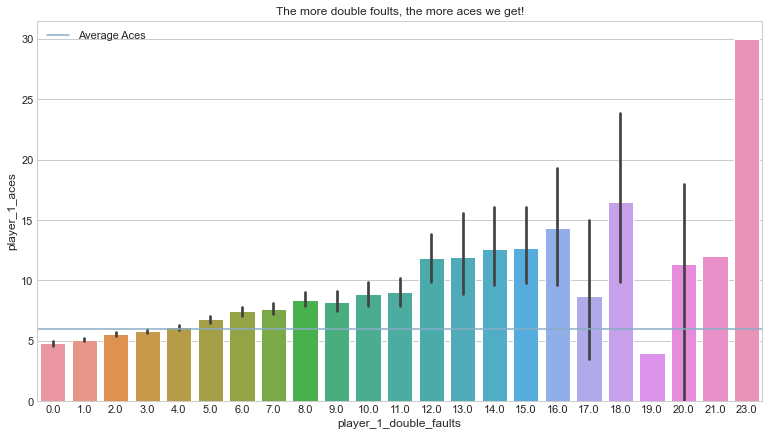

In [56]:
plt.title("The more double foults, the more aces we get!")
sns.barplot(x="player_1_double_faults", y="player_1_aces", data=train)
age_mean = train.player_1_aces.mean()
plt.axhline(age_mean, label="Average Aces")
plt.legend()
plt.show()


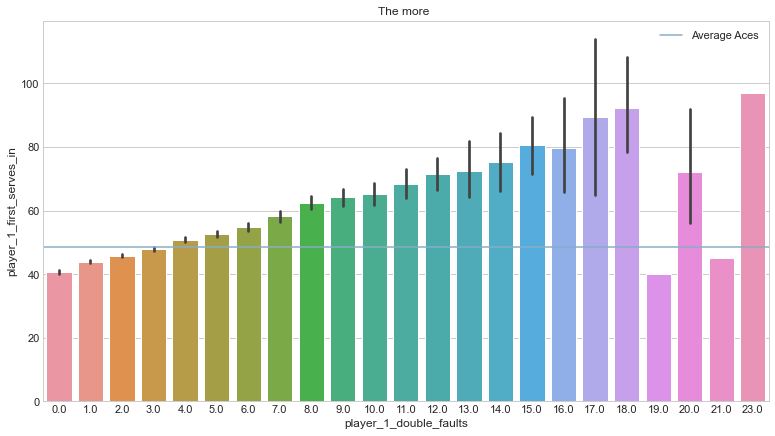

In [59]:
plt.title("The more more double foults the more first serves")
sns.barplot(x="player_1_double_faults", y="player_1_first_serves_in", data=train)
age_mean = train.player_1_first_serves_in.mean()
plt.axhline(age_mean, label="Average Aces")
plt.legend()
plt.show()

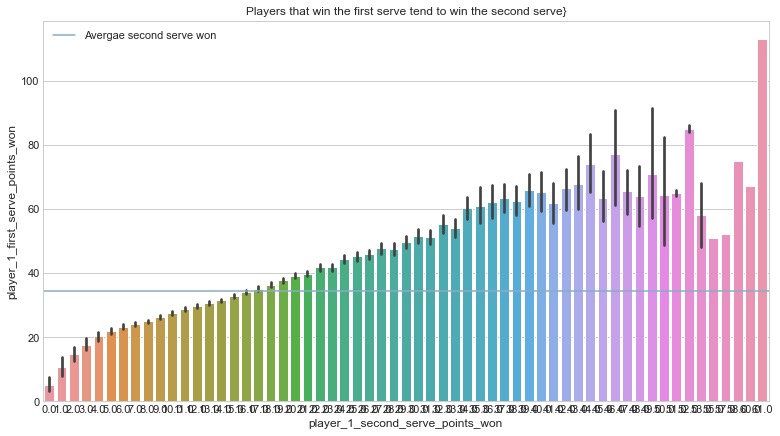

In [63]:
plt.title("Players that win the first serve tend to win the second serve}")
sns.barplot(x="player_1_second_serve_points_won", y="player_1_first_serve_points_won", data=train)
age_mean = train.player_1_first_serve_points_won.mean()
plt.axhline(age_mean, label="Avergae second serve won")
plt.legend()
plt.show()

In [26]:
train

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-31,2005-408,Milan,Carpet,32,A,7,6-3 6-3,3,R32,69.0,Gael Monfils,Julien Benneteau,18.417522,23.115674,WC,NaN,R,R,193.0,185.0,104792,103898,FRA,FRA,Gael Monfils,Julien Benneteau,192.0,61.0,224.0,595.0,NaN,NaN,13.0,4.0,5.0,5.0,56.0,64.0,30.0,44.0,27.0,26.0,11.0,8.0,9.0,9.0,3.0,8.0,4.0,12.0,Gael Monfils,0.535714,0.687500,0.900000,0.590909,4.0,1.0,True,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2003-04-28,2003-573,Valencia,Clay,32,A,23,6-4 6-0,3,R16,57.0,Christophe Rochus,Markus Hipfl,24.366872,25.004791,NaN,NaN,R,R,170.0,178.0,103294,103182,BEL,AUT,Christophe Rochus,Markus Hipfl,134.0,207.0,288.0,166.0,NaN,NaN,3.0,2.0,0.0,0.0,44.0,59.0,27.0,45.0,21.0,22.0,11.0,6.0,8.0,8.0,1.0,2.0,2.0,7.0,Christophe Rochus,0.613636,0.762712,0.777778,0.488889,5.0,1.0,True,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2008-05-25,2008-520,Roland Garros,Clay,128,G,51,6-2 6-4 7-6(5),5,R128,132.0,Guillermo Garcia Lopez,Sergio Roitman,24.977413,29.029432,NaN,NaN,R,R,188.0,185.0,104198,103373,ESP,ARG,Guillermo Garcia Lopez,Sergio Roitman,96.0,87.0,477.0,496.0,NaN,NaN,3.0,1.0,3.0,1.0,103.0,84.0,66.0,53.0,43.0,32.0,23.0,17.0,15.0,15.0,6.0,3.0,9.0,9.0,Guillermo Garcia Lopez,0.640777,0.630952,0.651515,0.603774,6.0,3.0,True,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
2006-10-02,2006-329,Tokyo,Hard,48,A,33,6-2 6-1,3,R16,52.0,Roger Federer,Wesley Moodie,25.149897,27.630390,NaN,NaN,R,R,185.0,196.0,103819,103325,SUI,RSA,Roger Federer,Wesley Moodie,1.0,73.0,7120.0,550.0,1.0,13.0,5.0,4.0,0.0,2.0,40.0,44.0,27.0,24.0,23.0,14.0,10.0,7.0,8.0,7.0,0.0,4.0,0.0,8.0,Roger Federer,0.675000,0.545455,0.851852,0.583333,4.0,0.0,True,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2018-02-26,2018-M004,Acapulco,Hard,32,A,287,6-3 5-7 6-4,3,R16,136.0,Diego Schwartzman,Ryan Harrison,25.530459,25.806982,NaN,NaN,R,R,170.0,183.0,106043,105992,ARG,USA,Diego Schwartzman,Ryan Harrison,18.0,60.0,2220.0,875.0,NaN,NaN,8.0,9.0,3.0,5.0,84.0,118.0,48.0,70.0,38.0,47.0,15.0,24.0,15.0,16.0,1.0,7.0,5.0,10.0,Ryan Harrison,0.571429,0.593220,0.791667,0.671429,3.0,4.0,False,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-07-31,2006-418,Washington,Hard,48,A,37,7-5 6-2,3,R16,75.0,Andy Murray,Feliciano Lopez,19.211499,24.859685,NaN,NaN,R,L,190.0,188.0,104918,103852,GBR,ESP,Andy Murray,Feliciano Lopez,35.0,63.0,916.0,625.0,8.0,12.0,2.0,6.0,6.0,6.0,62.0,58.0,25.0,34.0,22.0,25.0,24.0,10.0,10.0,10.0,4.0,3.0,4.0,6.0,Andy Murray,0.403226,0.586207,

In [27]:
# create a copy of train to manipulate 
train_temp = train.copy()

In [28]:
# assign variables to respective data
righties = train_temp[train_temp.player_2_hand == 'R']
lefties = train_temp[train_temp.player_2_hand == 'L']

In [29]:

stat, p = stats.mannwhitneyu(righties.player_1_rank_points, lefties.player_1_rank_points)
stat, p

(20486738.5, 0.3497779252761064)

In [30]:
stat, p = stats.mannwhitneyu(righties.player_2_rank_points, lefties.player_2_rank_points)
stat, p

(19585791.5, 6.868970336393839e-05)

## Takeaway
With such a low p-value, we reject the null hypothesis that average ranking points between righties and lefties are the same. We move forward with the understanding that lefties on average have more ranking points.

In [31]:
# assign variables to respective data
clay = train_temp[train_temp.surface == 'Clay']
hard = train_temp[train_temp.surface == 'Hard']
grass = train_temp[train_temp.surface == 'Grass']
carpet = train_temp[train_temp.surface == 'Carpet']

In [32]:
grass

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-20,2016-0741,Nottingham,Grass,64,A,272,7-5 6-2,3,R32,71.0,Evgeny Donskoy,Marcos Baghdatis,26.116359,31.008898,NaN,NaN,R,R,185.0,183.0,105539,104571,RUS,CYP,Evgeny Donskoy,Marcos Baghdatis,79.0,40.0,705.0,1130.0,NaN,9.0,2.0,9.0,3.0,1.0,66.0,53.0,49.0,32.0,30.0,26.0,7.0,17.0,10.0,10.0,4.0,2.0,7.0,2.0,Marcos Baghdatis,0.742424,0.603774,0.612245,0.812500,0.0,3.0,False,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2019-07-01,2019-540,Wimbledon,Grass,128,G,152,6-4 6-3 6-2,5,R128,88.0,Jan Lennard Struff,Radu Albot,29.182752,29.634497,NaN,NaN,R,R,193.0,175.0,105526,105430,GER,MDA,Jan Lennard Struff,Radu Albot,33.0,40.0,1265.0,1126.0,33.0,NaN,17.0,5.0,2.0,1.0,81.0,77.0,44.0,49.0,36.0,35.0,22.0,11.0,13.0,14.0,3.0,2.0,3.0,7.0,Jan Lennard Struff,0.543210,0.636364,0.818182,0.714286,5.0,0.0,True,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
1999-06-21,1999-540,Wimbledon,Grass,128,G,9,6-1 6-4 6-2,5,R128,80.0,Greg Rusedski,Jason Stoltenberg,25.787817,29.212868,NaN,NaN,L,R,193.0,185.0,102257,101727,GBR,AUS,Greg Rusedski,Jason Stoltenberg,12.0,42.0,2252.0,936.0,9.0,NaN,5.0,2.0,3.0,2.0,73.0,82.0,42.0,48.0,38.0,31.0,21.0,15.0,13.0,12.0,1.0,5.0,1.0,10.0,Greg Rusedski,0.575342,0.585366,0.904762,0.645833,5.0,0.0,True,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2001-06-25,2001-540,Wimbledon,Grass,128,G,21,6-2 5-7 6-4 6-2,5,R128,140.0,Dominik Hrbaty,Raemon Sluiter,23.471595,23.200548,NaN,NaN,R,R,183.0,185.0,103103,103171,SVK,NED,Dominik Hrbaty,Raemon Sluiter,20.0,98.0,1295.0,435.0,22.0,NaN,7.0,9.0,9.0,4.0,128.0,112.0,83.0,59.0,49.0,45.0,21.0,29.0,19.0,19.0,9.0,7.0,16.0,10.0,Raemon Sluiter,0.648438,0.526786,0.590361,0.762712,3.0,7.0,False,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
2013-06-24,2013-540,Wimbledon,Grass,128,G,48,6-3 6-2 6-0,5,R128,69.0,Roger Federer,Victor Hanescu,31.876797,31.926078,NaN,NaN,R,R,185.0,198.0,103819,103812,SUI,ROU,Roger Federer,Victor Hanescu,3.0,48.0,7740.0,895.0,3.0,NaN,7.0,3.0,0.0,1.0,56.0,61.0,39.0,52.0,35.0,26.0,14.0,3.0,12.0,11.0,0.0,2.0,0.0,8.0,Roger Federer,0.696429,0.852459,0.897436,0.500000,6.0,0.0,True,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-24,2013-540,Wimbledon,Grass,128,G,69,6-0 6-3 6-7(5) 6-3,5,R64,148.0,Go Soeda,Richard Gasquet,28.799452,27.017112,Q,NaN,R,R,178.0,185.0,104424,104755,JPN,FRA,Go Soeda,Richard Gasquet,129.0,9.0,442.0,3135.0,NaN,9.0,2.0,11.0,3.0,5.0,124.0,107.0,69.0,61.0,45.0,47.0,20.0,23.0,17.0,19.0,9.0,2.0,18.0,6.0

<AxesSubplot:>

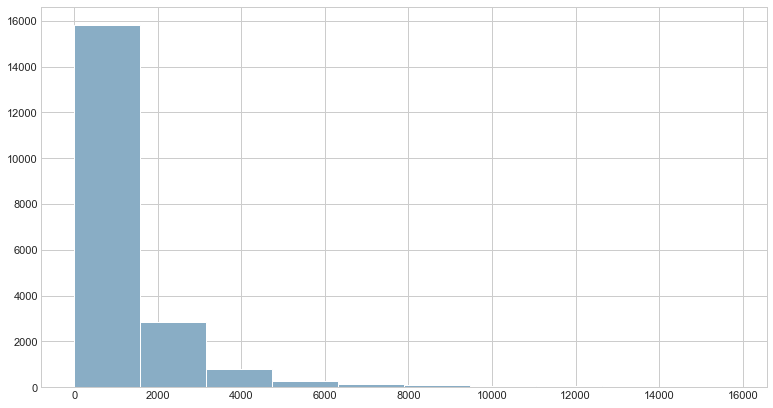

In [33]:
train_temp.player_1_rank_points.hist()

<AxesSubplot:>

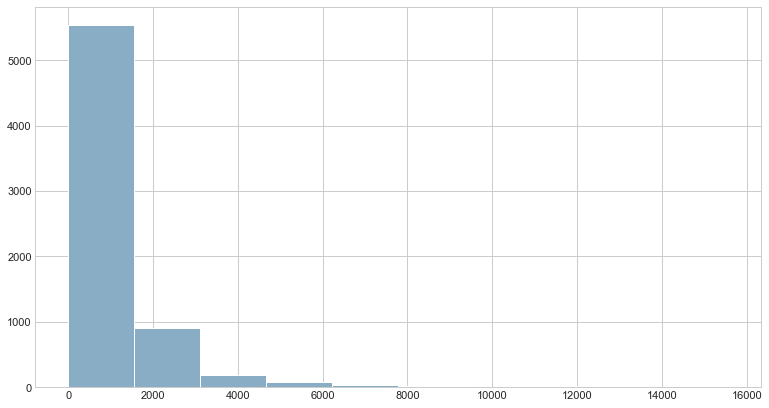

In [34]:
clay.player_1_rank_points.hist()

I suddenly realized that we cannot really look at the distribution of ranking points on a particular surface.

In [35]:
def juxtapose_distributions(C1, C2, C3, C4, feature):
    
    '''
    This function creates a figure and plots the histograms of the specified variable across 3 subset dataframes
    '''

    plt.figure(figsize = (8, 5))    # create figure

    f_string = feature.replace('_', ' ').capitalize()

    plt.hist([C1[feature], C2[feature], C3[feature], C4[feature]],      # plot histograms side-by-side
            label = ['clay', 'hard', 'grass', 'carpet'],     # label each distribution
            color = ['indianred', 'royalblue', 'green', 'gray']    # assign color to each distribution
            )

    plt.legend()    # show labels
    plt.title(f'Distribution of {f_string}', size = 16, pad = 6)    # title grid
    plt.xlabel(f_string, size = 13)      # label x-axis
    plt.ylabel('Frequency', size = 13);     # label y-axis

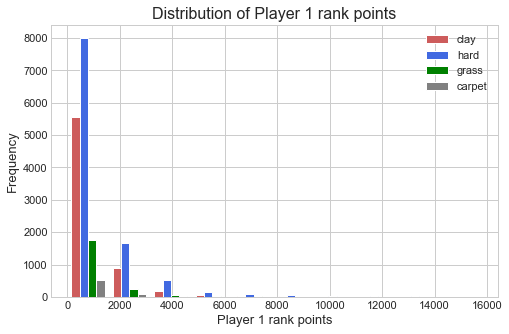

In [36]:
juxtapose_distributions(clay, hard, grass, carpet, 'player_1_rank_points')

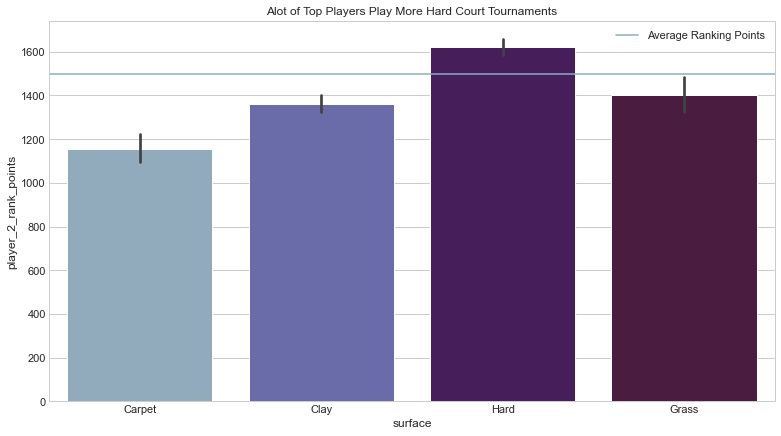

In [37]:
# plt.title("top players seem to do better in grass")
plt.title('Alot of Top Players Play More Hard Court Tournaments')
sns.barplot(x='surface', y="player_2_rank_points", data=train)
age_mean = train.player_2_rank_points.mean()
plt.axhline(age_mean, label="Average Ranking Points")
plt.legend()
plt.show()

In [38]:
clay.player_2_rank_points.mean()

1361.2499632406998

# Takeway
- top players play tornaments in hard surface than any other tournament 

####### - top players do better in grass  
Top players play more hard court tournaments than any other tournaments

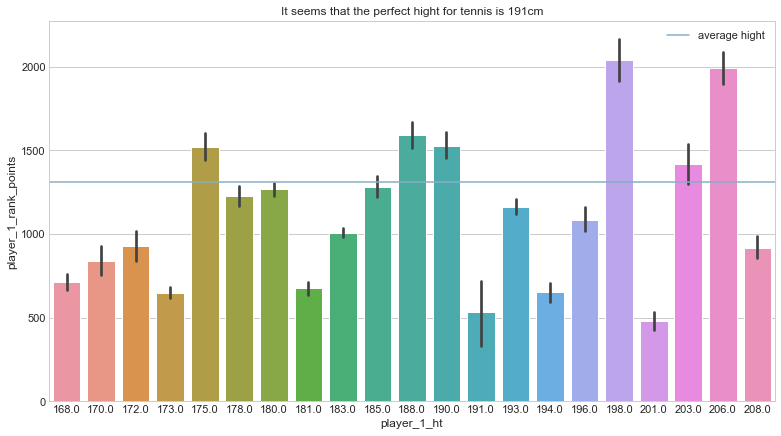

In [39]:
plt.title("It seems that the perfect hight for tennis is 191cm")
sns.barplot(x='player_1_ht', y="player_1_rank_points", data=train)
ranking_points_mean = train.player_1_rank_points.mean()
plt.axhline(ranking_points_mean, label="average hight")
plt.legend()
plt.show()

- if you want to be a pro, do not be 181cm, 191cm, 201cm
#### - Is there a correlation between player ranking points and player height?

$H_0$ = There is no relationship between height and and the ranking points 

$H_a$ = There is relationship between hight and and the ranking poins 

<Figure size 648x648 with 0 Axes>

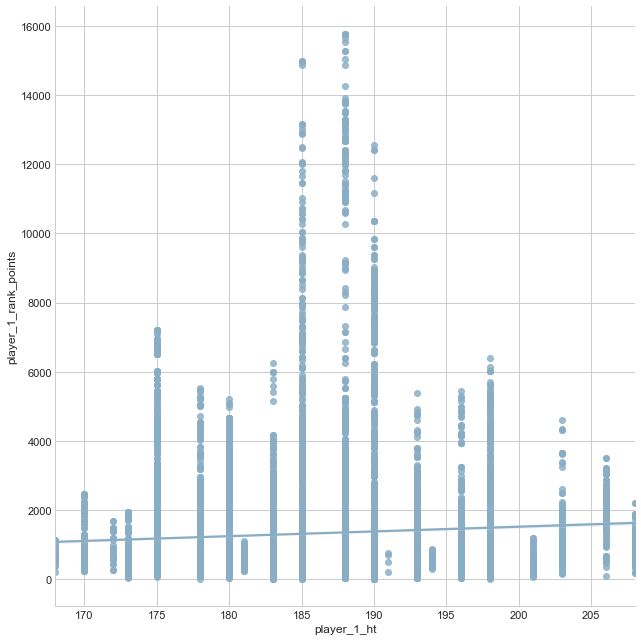

In [40]:
plt.figure(figsize = (9, 9))
sns.lmplot(x = 'player_1_ht',
           y = 'player_1_rank_points',
           data = train,
           size = 9
    )

In [41]:
train_temp = train.copy()
train_temp = train_temp[train_temp.player_1_ht.notnull()]
train_temp = train_temp[train_temp.player_1_rank_points.notnull()]

In [42]:
from scipy import stats
r, p = stats.pearsonr(train_temp.player_1_ht, train_temp.player_1_rank_points)
r, p

(0.06353447041194528, 2.0219106324624848e-19)

In [43]:
#return_chi2 defines one parameter, an observed cross-tabulation, runs the stats.chi2_contingency function and returns the test results in a readable format.
def return_chi2(observed):
    from scipy import stats
    #run the test
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    #print the rest
    print('Observed')
    print('--------')
    print(observed.values)
    print('=====================')
    print('Expected')
    print('--------')
    print(expected.astype(int))
    print('=====================')
    print(f'Degrees of Freedom: {degf}')
    print('=====================')
    print('Chi^2 and P')
    print('-----------')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p = {p:.4f}')

In [45]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'match_num', 'score', 'best_of', 'round', 'minutes', 'player_1',
       'player_2', 'player_1_age', 'player_2_age', 'player_1_entry',
       'player_2_entry', 'player_1_hand', 'player_2_hand', 'player_1_ht',
       'player_2_ht', 'player_1_id', 'player_2_id', 'player_1_ioc',
       'player_2_ioc', 'player_1_name', 'player_2_name', 'player_1_rank',
       'player_2_rank', 'player_1_rank_points', 'player_2_rank_points',
       'player_1_seed', 'player_2_seed', 'player_1_aces', 'player_2_aces',
       'player_1_double_faults', 'player_2_double_faults',
       'player_1_service_points', 'player_2_service_points',
       'player_1_first_serves_in', 'player_2_first_serves_in',
       'player_1_first_serve_points_won', 'player_2_first_serve_points_won',
       'player_1_second_serve_points_won', 'player_2_second_serve_points_won',
       'player_1_service_game_total', 'player_2_service_game_total',
       'pl

In [46]:
train[train['player_1_ht'] == 191].sum()

tourney_id             2014-5052018-69672019-5802017-0329
tourney_name     Vina del MarShenzhenAustralian OpenTokyo
surface                                  ClayHardHardHard
draw_size                                             220
tourney_level                                        AAGA
                                   ...                   
round_R16                                               0
round_R32                                               3
round_R64                                               0
round_RR                                                0
round_SF                                                0
Length: 73, dtype: object

In [47]:
train.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-31,2005-408,Milan,Carpet,32,A,7,6-3 6-3,3,R32,69.0,Gael Monfils,Julien Benneteau,18.417522,23.115674,WC,NaN,R,R,193.0,185.0,104792,103898,FRA,FRA,Gael Monfils,Julien Benneteau,192.0,61.0,224.0,595.0,NaN,NaN,13.0,4.0,5.0,5.0,56.0,64.0,30.0,44.0,27.0,26.0,11.0,8.0,9.0,9.0,3.0,8.0,4.0,12.0,Gael Monfils,0.535714,0.6875,0.9,0.590909,4.0,1.0,True,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0


In [48]:
train.score

tourney_date
2005-01-31                 6-3 6-3
2003-04-28                 6-4 6-0
2008-05-25          6-2 6-4 7-6(5)
2006-10-02                 6-2 6-1
2018-02-26             6-3 5-7 6-4
                      ...         
2006-07-31                 7-5 6-2
2009-04-27                 7-5 6-4
2002-06-24    6-3 6-4 3-6 4-6 11-9
2003-08-25      6-3 6-1 5-7 7-6(8)
2006-10-02          3-6 6-3 7-6(4)
Name: score, Length: 20142, dtype: object

In [49]:
train.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'match_num', 'score', 'best_of', 'round', 'minutes', 'player_1',
       'player_2', 'player_1_age', 'player_2_age', 'player_1_entry',
       'player_2_entry', 'player_1_hand', 'player_2_hand', 'player_1_ht',
       'player_2_ht', 'player_1_id', 'player_2_id', 'player_1_ioc',
       'player_2_ioc', 'player_1_name', 'player_2_name', 'player_1_rank',
       'player_2_rank', 'player_1_rank_points', 'player_2_rank_points',
       'player_1_seed', 'player_2_seed', 'player_1_aces', 'player_2_aces',
       'player_1_double_faults', 'player_2_double_faults',
       'player_1_service_points', 'player_2_service_points',
       'player_1_first_serves_in', 'player_2_first_serves_in',
       'player_1_first_serve_points_won', 'player_2_first_serve_points_won',
       'player_1_second_serve_points_won', 'player_2_second_serve_points_won',
       'player_1_service_game_total', 'player_2_service_game_total',
       'pl

In [50]:
df.surface.unique()

array(['Hard', 'Carpet', 'Clay', 'Grass'], dtype=object)

In [51]:
df.shape

(35969, 75)

In [2]:
df.surface.value_counts()

NameError: name 'df' is not defined